# **Proyecto No. 3 Data & Analytics**





### **Entregable 1:** 
#### Análisis Exploratorio de datos (EDA) - Estadística Descriptiva; Incluir la generación de nuevas variables de valor.

In [ ]:
# Cargamos las librerías que vamos a utilizar
import pandas as pd
import seaborn as sns
import statistics as stats 
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [ ]:
# Para utilizar el archivo Data_Nutricion_grupos.csv, en un caso personal, yo lo subí a GitHub por cuestiones de practicidad. En este sentido,
# vamos a generar el primer dataframe a partir del archivo almacenado en el repositorio mencionado. Como el archivo viene separado
# por punto y coma, vamos a ingresar el separador "sep", seguido por el punto y coma. 
csv_path = ('https://raw.githubusercontent.com/israelvc8214/Proyecto-No.-3/main/Data_Nutricion_grupos.csv')
df = pd.read_csv(csv_path, sep=';')
df
# Desde un particular punto de vista y para fines del ejercicio, yo cree 4 variables categoricas o cualitativas agrupando las variables relativas a los pliegues corporales
# de las personas de la muestra (biceps, triceps, escapular y suprailiaco)

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,...,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,grupos_biceps,grupos_triceps,grupos_escapular,grupos_suprailiaco
0,Persona 1,155.7,16.0,71.2,35.7,29.58,90.0,98.0,0.92,0.58,...,45.25,13.0,27.0,32.0,34.0,A,D,E,E,E
1,Persona 2,166.5,16.0,61.0,31.8,22.36,80.9,100.5,0.80,0.49,...,43.44,5.0,19.0,15.0,22.0,A,B,D,C,E
2,Persona 3,151.3,16.0,49.1,30.5,21.62,72.0,86.0,0.84,0.48,...,34.44,13.0,18.0,18.0,17.0,A,D,D,D,D
3,Persona 4,151.7,16.0,54.6,32.6,23.12,NaN,88.4,0.84,0.49,...,39.38,5.0,19.0,15.0,18.0,A,B,D,C,D
4,Persona 5,160.3,16.0,58.0,30.1,22.26,NaN,97.9,0.81,NaN,...,40.44,10.0,19.0,20.0,19.0,A,C,D,E,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Persona 648,165.5,14.0,88.0,32.5,21.03,72.5,85.0,0.85,0.44,...,71.10,12.0,13.0,12.0,13.0,B,C,C,C,C
648,Persona 649,144.2,14.0,48.6,31.5,23.13,73.0,87.5,0.83,0.51,...,34.72,8.0,18.0,18.0,16.0,B,B,D,D,C
649,Persona 650,154.0,15.0,58.9,31.5,22.77,85.0,96.0,0.89,0.55,...,43.22,8.0,12.0,14.0,18.0,B,B,C,C,D
650,Persona 651,174.3,14.0,88.7,37.0,27.02,85.8,101.0,0.85,0.49,...,68.81,11.0,16.0,18.0,20.0,B,C,D,D,E


In [ ]:
# Exploramos los datos y podemos observar que sí tenemos datos perdidos. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [ ]:
# Verificamos el número de variables y observaciones
print("La cantidad de columnas en los datos es: ",df.shape[1])
print("La cantidad de filas en los datos es: ",df.shape[0])

La cantidad de columnas en los datos es:  21
La cantidad de filas en los datos es:  652


In [ ]:
# Verificamos los duplicados, por lo que se observa que no existen duplicados. 
df[df["Individuo"].duplicated()].head()

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,...,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,grupos_biceps,grupos_triceps,grupos_escapular,grupos_suprailiaco


In [ ]:
# Revisamos si existen datos perdidos. Al existir datos perdidos es necesario realizar un reprocesamiento de las variables para cubrir
# los datos faltantes
df.isna().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
grupos_biceps                   0
grupos_triceps                  0
grupos_escapular                0
grupos_suprailiaco              0
dtype: int64

<ipython-input-8-42e34f0f59e0>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


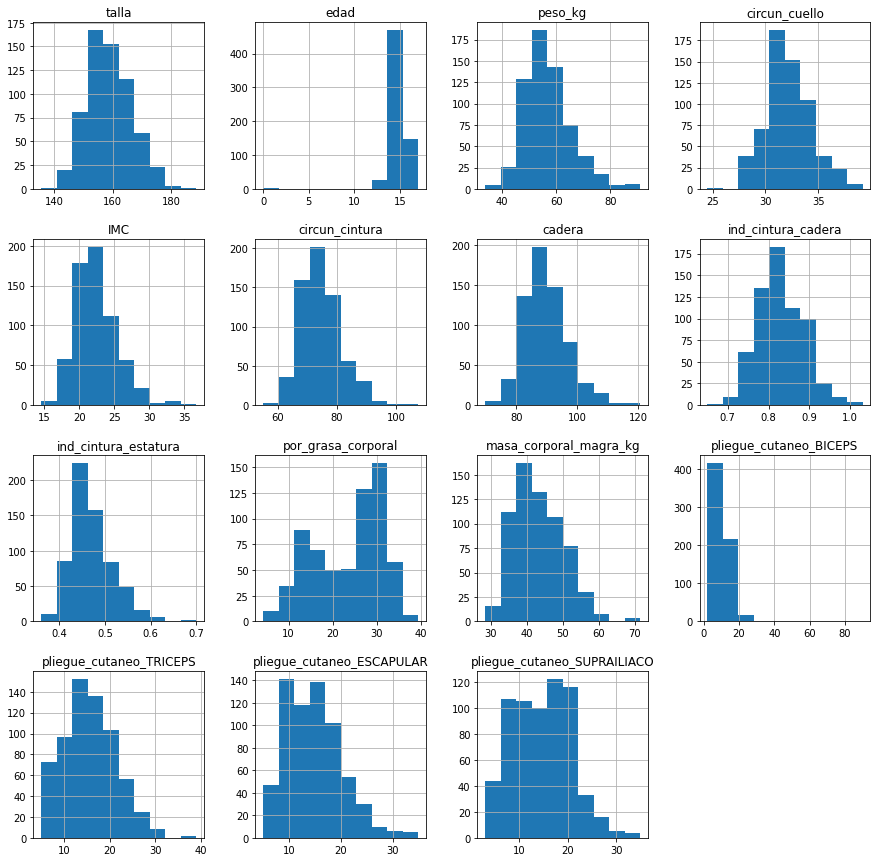

In [ ]:
# Generamos gráficos para visualizar las variables con datos perdidos
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [ ]:
# Analizamos los datos cualitativos 
df.groupby('Grupos').size().sort_values()

Grupos
B    315
A    337
dtype: int64

In [ ]:
df.groupby('grupos_biceps').size().sort_values()

grupos_biceps
E     50
D    112
A    121
C    146
B    223
dtype: int64

In [ ]:
df.groupby('grupos_triceps').size().sort_values()

grupos_triceps
A     47
B     53
E    117
C    173
D    262
dtype: int64

In [ ]:
df.groupby('grupos_escapular').size().sort_values()

grupos_escapular
A     77
D    102
E    105
B    141
C    227
dtype: int64

In [ ]:
df.groupby('grupos_suprailiaco').size().sort_values()

grupos_suprailiaco
D    115
A    119
B    133
C    140
E    145
dtype: int64

In [ ]:
# Generamos un dataframe de variables cualitativas que puede ser usado posteriormente
df_cual=pd.DataFrame(data=df, columns=['Grupos', 'grupos_biceps', 'grupos_triceps', 'grupos_escapular', 'grupos_suprailiaco'])
cols_cual = df_cual.columns 
df_cual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Grupos              652 non-null    object
 1   grupos_biceps       652 non-null    object
 2   grupos_triceps      652 non-null    object
 3   grupos_escapular    652 non-null    object
 4   grupos_suprailiaco  652 non-null    object
dtypes: object(5)
memory usage: 25.6+ KB


In [ ]:
# Recodificamos las variables cualitativas
df_cual['Grupos'] = df_cual['Grupos'].replace(['A', 'B'], ['Bajo Riesgo', 'Alto Riesgo'])
df_cual['grupos_biceps'] = df_cual['grupos_biceps'].replace(['A', 'B', 'C', 'D', 'E'], ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E'])
df_cual['grupos_triceps'] = df_cual['grupos_triceps'].replace(['A', 'B', 'C', 'D', 'E'], ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E'])
df_cual['grupos_escapular'] = df_cual['grupos_escapular'].replace(['A', 'B', 'C', 'D', 'E'], ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E'])
df_cual['grupos_suprailiaco'] = df_cual['grupos_suprailiaco'].replace(['A', 'B', 'C', 'D', 'E'], ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E'])
df_cual

,Grupos,grupos_biceps,grupos_triceps,grupos_escapular,grupos_suprailiaco
0,Bajo Riesgo,Grupo D,Grupo E,Grupo E,Grupo E
1,Bajo Riesgo,Grupo B,Grupo D,Grupo C,Grupo E
2,Bajo Riesgo,Grupo D,Grupo D,Grupo D,Grupo D
3,Bajo Riesgo,Grupo B,Grupo D,Grupo C,Grupo D
4,Bajo Riesgo,Grupo C,Grupo D,Grupo E,Grupo D
...,...,...,...,...,...
647,Alto Riesgo,Grupo C,Grupo C,Grupo C,Grupo C
648,Alto Riesgo,Grupo B,Grupo D,Grupo D,Grupo C
649,Alto Riesgo,Grupo B,Grupo C,Grupo C,Grupo D
650,Alto Riesgo,Grupo C,Grupo D,Grupo D,Grupo E


In [ ]:
# Generamos un dataframe para concatenar
df_concat = pd.DataFrame(data=df, columns=['Individuo', 'talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura', 'por_grasa_corporal', 'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'])
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [ ]:
# Concatenamos el datframe
df1 = pd.merge(df_concat, df_cual, left_index=True, right_index=True)
df1

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,...,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,grupos_biceps,grupos_triceps,grupos_escapular,grupos_suprailiaco
0,Persona 1,155.7,16.0,71.2,35.7,29.58,90.0,98.0,0.92,0.58,...,45.25,13.0,27.0,32.0,34.0,Bajo Riesgo,Grupo D,Grupo E,Grupo E,Grupo E
1,Persona 2,166.5,16.0,61.0,31.8,22.36,80.9,100.5,0.80,0.49,...,43.44,5.0,19.0,15.0,22.0,Bajo Riesgo,Grupo B,Grupo D,Grupo C,Grupo E
2,Persona 3,151.3,16.0,49.1,30.5,21.62,72.0,86.0,0.84,0.48,...,34.44,13.0,18.0,18.0,17.0,Bajo Riesgo,Grupo D,Grupo D,Grupo D,Grupo D
3,Persona 4,151.7,16.0,54.6,32.6,23.12,NaN,88.4,0.84,0.49,...,39.38,5.0,19.0,15.0,18.0,Bajo Riesgo,Grupo B,Grupo D,Grupo C,Grupo D
4,Persona 5,160.3,16.0,58.0,30.1,22.26,NaN,97.9,0.81,NaN,...,40.44,10.0,19.0,20.0,19.0,Bajo Riesgo,Grupo C,Grupo D,Grupo E,Grupo D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Persona 648,165.5,14.0,88.0,32.5,21.03,72.5,85.0,0.85,0.44,...,71.10,12.0,13.0,12.0,13.0,Alto Riesgo,Grupo C,Grupo C,Grupo C,Grupo C
648,Persona 649,144.2,14.0,48.6,31.5,23.13,73.0,87.5,0.83,0.51,...,34.72,8.0,18.0,18.0,16.0,Alto Riesgo,Grupo B,Grupo D,Grupo D,Grupo C
649,Persona 650,154.0,15.0,58.9,31.5,22.77,85.0,96.0,0.89,0.55,...,43.22,8.0,12.0,14.0,18.0,Alto Riesgo,Grupo B,Grupo C,Grupo C,Grupo D
650,Persona 651,174.3,14.0,88.7,37.0,27.02,85.8,101.0,0.85,0.49,...,68.81,11.0,16.0,18.0,20.0,Alto Riesgo,Grupo C,Grupo D,Grupo D,Grupo E


In [ ]:
# Tratamiento de los datos
# Una vez revisados los datos nulos vemos que las variables contienen datos float y dos variables tipo objeto, por lo que el tratamiento
# es el siguiente: 
df1.isna().sum()

Individuo                       0
talla                          28
edad                            7
peso_kg                        23
circun_cuello                  29
IMC                            12
circun_cintura                 15
cadera                          5
ind_cintura_cadera             13
ind_cintura_estatura           16
por_grasa_corporal              2
masa_corporal_magra_kg          4
pliegue_cutaneo_BICEPS          0
pliegue_cutaneo_TRICEPS         0
pliegue_cutaneo_ESCAPULAR       0
pliegue_cutaneo_SUPRAILIACO     0
Grupos                          0
grupos_biceps                   0
grupos_triceps                  0
grupos_escapular                0
grupos_suprailiaco              0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Individuo                    652 non-null    object 
 1   talla                        624 non-null    float64
 2   edad                         645 non-null    float64
 3   peso_kg                      629 non-null    float64
 4   circun_cuello                623 non-null    float64
 5   IMC                          640 non-null    float64
 6   circun_cintura               637 non-null    float64
 7   cadera                       647 non-null    float64
 8   ind_cintura_cadera           639 non-null    float64
 9   ind_cintura_estatura         636 non-null    float64
 10  por_grasa_corporal           650 non-null    float64
 11  masa_corporal_magra_kg       648 non-null    float64
 12  pliegue_cutaneo_BICEPS       652 non-null    float64
 13  pliegue_cutaneo_TRIC

In [ ]:
# Generamos el promedio de la talla
media_talla=df1['talla'].mean().round(1)
media_talla

158.8

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['talla']=df1['talla'].fillna(media_talla)

In [ ]:
# Generamos la moda de la edad
# Importamos librería
from statistics import mode
moda_edad=mode(df1['edad'])
moda_edad

14.0

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['edad']=df1['edad'].fillna(moda_edad)

In [ ]:
# Generamos el promedio del peso
media_peso_kg=df1['peso_kg'].mean().round(1)
media_peso_kg

56.9

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['peso_kg']=df1['peso_kg'].fillna(media_peso_kg)

In [ ]:
# Generamos el promedio de circun_cuello
media_circun_cuello=df1['circun_cuello'].mean().round(1)
media_circun_cuello

32.1

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['circun_cuello']=df1['circun_cuello'].fillna(media_circun_cuello)

In [ ]:
# Generamos el promedio del indice de masa corporal
media_IMC=df1['IMC'].mean().round(1)
media_IMC

22.4

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['IMC']=df1['IMC'].fillna(media_IMC)

In [ ]:
# Generamos el promedio de circun_cintura
media_circun_cintura=df1['circun_cintura'].mean().round(1)
media_circun_cintura

74.5

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['circun_cintura']=df1['circun_cintura'].fillna(media_circun_cintura)

In [ ]:
# Generamos el promedio de cadera
media_cadera=df1['cadera'].mean().round(1)
media_cadera

89.9

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['cadera']=df1['cadera'].fillna(media_cadera)

In [ ]:
# Generamos el promedio de indice cintura cadera
media_ind_cintura_cadera=df1['ind_cintura_cadera'].mean().round(1)
media_ind_cintura_cadera

0.8

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['ind_cintura_cadera']=df1['ind_cintura_cadera'].fillna(media_ind_cintura_cadera)

In [ ]:
# Generamos el promedio de indice cintura estatura
media_ind_cintura_estatura=df1['ind_cintura_estatura'].mean().round(1)
media_ind_cintura_estatura

0.5

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['ind_cintura_estatura']=df1['ind_cintura_estatura'].fillna(media_ind_cintura_estatura)

In [ ]:
# Generamos el promedio de grasa corporal
media_por_grasa_corporal=df1['por_grasa_corporal'].mean().round(1)
media_por_grasa_corporal

23.5

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['por_grasa_corporal']=df1['por_grasa_corporal'].fillna(media_por_grasa_corporal)

In [ ]:
# Generamos el promedio de grasa corporal
media_masa_corporal_magra_kg=df1['masa_corporal_magra_kg'].mean().round(1)
media_masa_corporal_magra_kg     

43.4

In [ ]:
# Generamos una nueva variable que incluya los datos perdidos 
df1['masa_corporal_magra_kg']=df1['masa_corporal_magra_kg'].fillna(media_masa_corporal_magra_kg)

In [ ]:
# Checamos nuevamente si quedan datos nulos 
df1.isna().sum()

Individuo                      0
talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
Grupos                         0
grupos_biceps                  0
grupos_triceps                 0
grupos_escapular               0
grupos_suprailiaco             0
dtype: int64

In [ ]:
# Verificamos un analisis descriptivo de los primeros datos
df1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
talla,652.0,158.82,7.32,135.60,153.80,158.80,163.30,188.60
edad,652.0,14.75,1.05,0.00,14.00,15.00,15.00,17.00
peso_kg,652.0,56.94,8.44,33.90,51.20,56.10,61.45,91.10
circun_cuello,652.0,32.14,2.11,24.50,30.70,32.10,33.50,39.20
IMC,652.0,22.43,3.02,14.54,20.31,22.19,23.86,36.71
circun_cintura,652.0,74.52,6.84,55.00,70.00,73.90,78.00,107.50
cadera,652.0,89.87,7.18,69.80,85.00,89.00,94.00,120.80
ind_cintura_cadera,652.0,0.83,0.05,0.65,0.80,0.83,0.87,1.03
ind_cintura_estatura,652.0,0.47,0.05,0.36,0.44,0.47,0.50,0.70
por_grasa_corporal,652.0,23.54,7.85,4.21,16.13,26.09,30.07,39.45


In [ ]:
# Quitamos el cero a la edad
df1.loc[df1['edad'] == 0, 'edad'] = int(df1['edad'].median())
df1['edad'] = df1['edad'].astype('int')

In [ ]:
# Corregimos el valor de pliegue cutaneo BICEPS
df1.loc[df1['pliegue_cutaneo_BICEPS'] == 90, 'pliegue_cutaneo_BICEPS'] = int(df1['pliegue_cutaneo_BICEPS'].median())

In [ ]:
# Verificamos un analisis descriptivo de los primeros datos
df1.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
talla,652.0,158.82,7.32,135.60,153.80,158.80,163.30,188.60
edad,652.0,14.77,0.88,12.00,14.00,15.00,15.00,17.00
peso_kg,652.0,56.94,8.44,33.90,51.20,56.10,61.45,91.10
circun_cuello,652.0,32.14,2.11,24.50,30.70,32.10,33.50,39.20
IMC,652.0,22.43,3.02,14.54,20.31,22.19,23.86,36.71
circun_cintura,652.0,74.52,6.84,55.00,70.00,73.90,78.00,107.50
cadera,652.0,89.87,7.18,69.80,85.00,89.00,94.00,120.80
ind_cintura_cadera,652.0,0.83,0.05,0.65,0.80,0.83,0.87,1.03
ind_cintura_estatura,652.0,0.47,0.05,0.36,0.44,0.47,0.50,0.70
por_grasa_corporal,652.0,23.54,7.85,4.21,16.13,26.09,30.07,39.45


<ipython-input-49-99601d931c1b>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df1.hist(ax = ax)


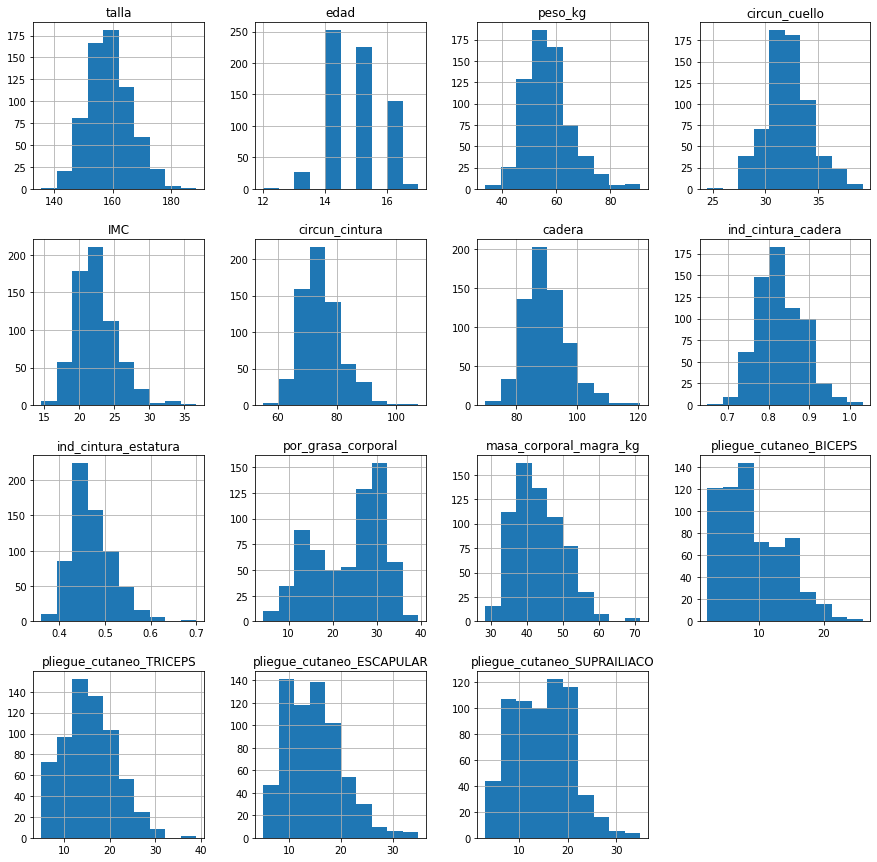

In [ ]:
# Generamos gráficos para visualizar las variables sin datos perdidos
fig = plt.figure(figsize=(15,15))
ax = fig.gca()
df1.hist(ax = ax)
plt.show()

In [ ]:
# Checamos las variables númericas
var_num = df1.select_dtypes(include=['float64', 'int']).columns
df1[var_num]

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,155.7,16,71.2,35.7,29.58,90.0,98.0,0.92,0.58,36.45,45.25,13.0,27.0,32.0,34.0
1,166.5,16,61.0,31.8,22.36,80.9,100.5,0.80,0.49,28.79,43.44,5.0,19.0,15.0,22.0
2,151.3,16,49.1,30.5,21.62,72.0,86.0,0.84,0.48,29.87,34.44,13.0,18.0,18.0,17.0
3,151.7,16,54.6,32.6,23.12,74.5,88.4,0.84,0.49,27.87,39.38,5.0,19.0,15.0,18.0
4,160.3,16,58.0,30.1,22.26,74.5,97.9,0.81,0.50,30.28,40.44,10.0,19.0,20.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,165.5,14,88.0,32.5,21.03,72.5,85.0,0.85,0.44,19.21,71.10,12.0,13.0,12.0,13.0
648,144.2,14,48.6,31.5,23.13,73.0,87.5,0.83,0.51,28.57,34.72,8.0,18.0,18.0,16.0
649,154.0,15,58.9,31.5,22.77,85.0,96.0,0.89,0.55,26.62,43.22,8.0,12.0,14.0,18.0
650,174.3,14,88.7,37.0,27.02,85.8,101.0,0.85,0.49,22.42,68.81,11.0,16.0,18.0,20.0


In [ ]:
# 1. Medidas de tendencia central 
# Generamos la media
def media(x):
  return stats.mean(x)
df1[var_num].apply(media, axis=0).round(2)

talla                          158.82
edad                            14.77
peso_kg                         56.94
circun_cuello                   32.14
IMC                             22.43
circun_cintura                  74.52
cadera                          89.87
ind_cintura_cadera               0.83
ind_cintura_estatura             0.47
por_grasa_corporal              23.54
masa_corporal_magra_kg          43.38
pliegue_cutaneo_BICEPS           9.06
pliegue_cutaneo_TRICEPS         15.65
pliegue_cutaneo_ESCAPULAR       14.38
pliegue_cutaneo_SUPRAILIACO     14.68
dtype: float64

In [ ]:
# Generamos la mediana
def mediana(x):
  return stats.median(x)
df1[var_num].apply(mediana, axis=0).round(2)

talla                          158.80
edad                            15.00
peso_kg                         56.10
circun_cuello                   32.10
IMC                             22.19
circun_cintura                  73.90
cadera                          89.00
ind_cintura_cadera               0.83
ind_cintura_estatura             0.47
por_grasa_corporal              26.09
masa_corporal_magra_kg          42.37
pliegue_cutaneo_BICEPS           8.00
pliegue_cutaneo_TRICEPS         16.00
pliegue_cutaneo_ESCAPULAR       14.00
pliegue_cutaneo_SUPRAILIACO     15.00
dtype: float64

In [ ]:
# Generamos la moda
from collections import Counter
def moda(x):
  c = Counter(x)
  return c.most_common(1)
df1[var_num].apply(moda, axis=0) # Dato y nro de veces

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,"(158.8, 29)","(14, 252)","(56.9, 30)","(30.5, 37)","(22.4, 12)","(71.0, 28)","(90.0, 28)","(0.82, 59)","(0.46, 66)","(28.79, 18)","(43.4, 4)","(5.0, 82)","(18.0, 53)","(10.0, 61)","(18.0, 49)"


In [ ]:
# Generamos el centro de amplitud
def centro_amplitud(x):
  return (max(x) + min(x))/2
df1[var_num].apply(centro_amplitud, axis=0).round(2) 

talla                          162.10
edad                            14.50
peso_kg                         62.50
circun_cuello                   31.85
IMC                             25.62
circun_cintura                  81.25
cadera                          95.30
ind_cintura_cadera               0.84
ind_cintura_estatura             0.53
por_grasa_corporal              21.83
masa_corporal_magra_kg          50.04
pliegue_cutaneo_BICEPS          14.00
pliegue_cutaneo_TRICEPS         22.00
pliegue_cutaneo_ESCAPULAR       20.00
pliegue_cutaneo_SUPRAILIACO     19.00
dtype: float64

In [ ]:
# Generamos media geometrica
import numpy as np  # K = platicurtica
def media_geometrica(iterable):
  ''' Calcula la media geométrica'''
  a = np.log(iterable)
  return "Media Geométrica", np.exp(a.sum()/len(a)).round(2)
df1[var_num].apply(media_geometrica, axis=0)

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica,Media Geométrica
1,158.65,14.74,56.35,32.07,22.23,74.22,89.59,0.83,0.47,21.94,42.85,7.89,14.55,13.44,13.36


In [ ]:
# Generamos la media armonica
def media_armonica(x):
  return "Media Armónica", round(stats.harmonic_mean(x),2)
df1[var_num].apply(media_armonica, axis=0)

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica,Media Armónica
1,158.49,14.72,55.77,32.0,22.05,73.92,89.32,0.83,0.47,20.02,42.34,6.85,13.37,12.53,11.94


In [ ]:
# Generamos la media recortada
from scipy import stats as nstats
def media_recortada_20(x):
  mr = nstats.trim_mean(x, proportiontocut=0.1).round(2) 
  return "Media recortada al 20%", mr
df1[var_num].apply(media_recortada_20, axis=0)

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%,Media recortada al 20%
1,158.62,14.75,56.33,32.04,22.2,74.02,89.43,0.83,0.47,23.95,42.97,8.61,15.44,13.97,14.48


In [ ]:
# Generamos la trimedia
def trimedia(x: pd.Series):
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    t = (Q1 + 2*Q2 + Q3) / 4
    return t
df1[var_num].apply(trimedia, axis=0).round(2) 

talla                          158.68
edad                            14.75
peso_kg                         56.21
circun_cuello                   32.10
IMC                             22.14
circun_cintura                  73.95
cadera                          89.25
ind_cintura_cadera               0.83
ind_cintura_estatura             0.47
por_grasa_corporal              24.60
masa_corporal_magra_kg          42.74
pliegue_cutaneo_BICEPS           8.25
pliegue_cutaneo_TRICEPS         15.50
pliegue_cutaneo_ESCAPULAR       14.00
pliegue_cutaneo_SUPRAILIACO     14.75
dtype: float64

In [ ]:
# Otras medidas de tendencia central
# Podemos generar un pivote y analizar algunas medidas de tendencia centran en las variables
pd.pivot_table(df1, index=["grupos_biceps"], aggfunc=["mean", "median"]).reset_index().round(2)

grupos_biceps   mean                                             \
                   IMC cadera circun_cintura circun_cuello   edad   
0       Grupo A  19.88  83.73          70.79         31.55  14.78   
1       Grupo B  21.86  88.59          73.89         32.16  14.72   
2       Grupo C  23.35  93.00          75.93         32.12  14.97   
3       Grupo D  23.71  92.39          75.69         32.28  14.61   
4       Grupo E  25.52  95.60          79.55         33.19  14.72   

                                                                          ...  \
  ind_cintura_cadera ind_cintura_estatura masa_corporal_magra_kg peso_kg  ...   
0               0.84                 0.43                  46.67   53.93  ...   
1               0.83                 0.46                  44.78   56.37  ...   
2               0.82                 0.49                  41.35   57.90  ...   
3               0.82                 0.49                  39.95   57.53  ...   
4               0.83                 0.51                  42.78   62.67  ...   

              median                                                      \
  ind_cintura_cadera ind_cintura_estatura masa_corporal_magra_kg peso_kg   
0               0.84                 0.43                  46.78   54.30   
1               0.83                 0.46                  44.59   55.70   
2               0.82                 0.48                  40.16   56.90   
3               0.82                 0.48                  38.91   55.85   
4               0.83                 0.50                  41.55   60.05   

                                                    \
  pliegue_cutaneo_BICEPS pliegue_cutaneo_ESCAPULAR   
0                    4.0                       9.0   
1                    6.0                      13.0   
2                   10.5                      16.0   
3                   14.0                      18.0   
4                   18.0                      18.0   

                                                                          \
  pliegue_cutaneo_SUPRAILIACO pliegue_cutaneo_TRICEPS por_grasa_corporal   
0                         7.0                     8.0              12.26   
1                        13.0                    14.0              19.92   
2                        18.0                    18.0              29.01   
3                        18.0                    19.0              30.58   
4                        20.0                    20.0              31.90   

          
   talla  
0  163.2  
1  159.2  
2  156.4  
3  155.0  
4  157.5  

[5 rows x 31 columns]

In [ ]:
# Podemos generar otro pivote para analizar solo la media
medias = pd.pivot_table(df1, index=["grupos_triceps"], aggfunc="mean").reset_index().round(2)
medias

,grupos_triceps,IMC,cadera,circun_cintura,circun_cuello,edad,ind_cintura_cadera,ind_cintura_estatura,masa_corporal_magra_kg,peso_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,pliegue_cutaneo_TRICEPS,por_grasa_corporal,talla
0,Grupo A,19.11,81.06,69.39,31.18,14.87,0.85,0.43,45.75,51.54,3.54,7.56,6.00,6.30,10.48,162.73
1,Grupo B,20.02,84.32,71.41,31.64,14.47,0.85,0.44,46.97,54.36,4.19,8.56,7.75,8.44,12.68,163.26
2,Grupo C,21.11,87.05,72.69,31.81,14.81,0.84,0.45,45.26,55.63,6.34,11.67,11.36,11.90,18.87,161.52
3,Grupo D,22.94,91.00,74.92,32.06,14.76,0.82,0.48,41.35,56.85,11.15,15.74,16.87,17.44,27.40,156.64
4,Grupo E,25.64,97.55,79.78,33.39,14.83,0.82,0.51,42.56,62.42,12.81,20.73,21.32,24.20,31.95,156.11


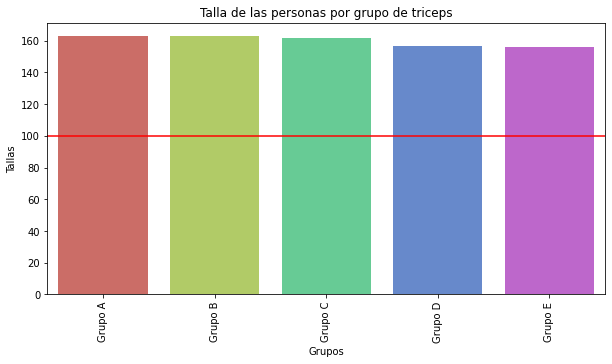

In [ ]:
# Podemos graficar las medias según una variable
plt.figure(figsize=(10,5))
g = sns.barplot(y="talla",
            x="grupos_triceps",
            data=medias,
            palette="hls" 
            )
g.set_xlabel("Grupos")
g.set_ylabel("Tallas")
g.set_title("Talla de las personas por grupo de triceps")

plt.axhline(100, color = 'red') 
plt.xticks(rotation=90)  
plt.show()

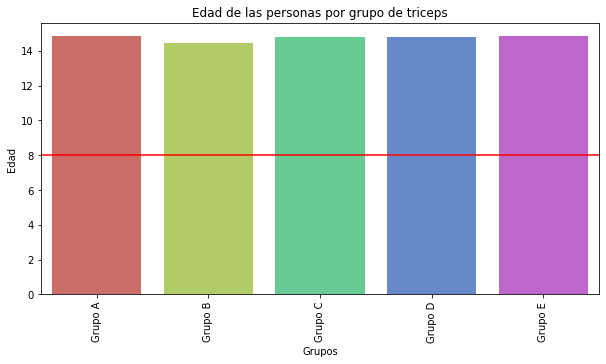

In [ ]:
# Podemos graficar las medias según una variable
plt.figure(figsize=(10,5))
g = sns.barplot(y="edad",
            x="grupos_triceps",
            data=medias,
            palette="hls" 
            )
g.set_xlabel("Grupos")
g.set_ylabel("Edad")
g.set_title("Edad de las personas por grupo de triceps")

plt.axhline(8, color = 'red') 
plt.xticks(rotation=90)  
plt.show()

In [ ]:
# Podemos generar otro pivote para analizar solo la mediana
medianas = pd.pivot_table(df1, index=["grupos_escapular"], aggfunc="median").reset_index().round(2)
medianas

,grupos_escapular,IMC,cadera,circun_cintura,circun_cuello,edad,ind_cintura_cadera,ind_cintura_estatura,masa_corporal_magra_kg,peso_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,pliegue_cutaneo_TRICEPS,por_grasa_corporal,talla
0,Grupo A,19.30,82.4,69.0,31.0,14,0.83,0.42,44.75,50.90,4.0,7.0,7.0,8.0,11.39,162.5
1,Grupo B,20.65,86.0,71.0,31.7,15,0.82,0.44,45.12,54.20,5.0,10.0,9.5,11.0,15.25,160.8
2,Grupo C,22.29,89.5,73.8,31.8,15,0.82,0.47,40.73,55.80,8.5,14.0,15.0,16.0,27.13,156.8
3,Grupo D,23.33,92.0,77.0,32.7,15,0.84,0.49,40.56,57.55,12.0,18.0,18.0,18.0,29.97,156.7
4,Grupo E,26.04,97.0,81.5,33.9,15,0.84,0.52,43.37,63.10,13.0,22.0,22.0,22.0,32.34,155.9


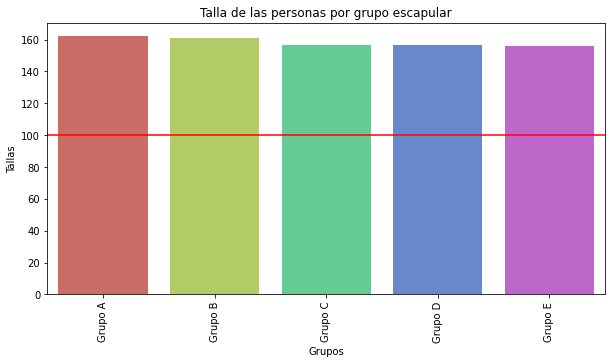

In [ ]:
# Podemos graficar las medias según una variable
plt.figure(figsize=(10,5))
g = sns.barplot(y="talla",
            x="grupos_escapular",
            data=medianas,
            palette="hls" 
            )
g.set_xlabel("Grupos")
g.set_ylabel("Tallas")
g.set_title("Talla de las personas por grupo escapular")

plt.axhline(100, color = 'red') 
plt.xticks(rotation=90)  
plt.show()

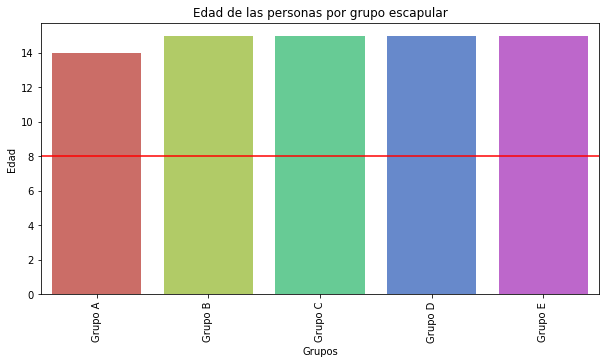

In [ ]:
# Podemos graficar las medias según una variable
plt.figure(figsize=(10,5))
g = sns.barplot(y="edad",
            x="grupos_escapular",
            data=medianas,
            palette="hls" 
            )
g.set_xlabel("Grupos")
g.set_ylabel("Edad")
g.set_title("Edad de las personas por grupo escapular")

plt.axhline(8, color = 'red') 
plt.xticks(rotation=90)  
plt.show()

In [ ]:
# 2. Medidas de dispersión 
# Podemos generar el rango 
def rango(x):
  min = np.min(x)
  max = np.max(x)
  r = max - min
  return min, max, r
range = df1[var_num].apply(rango, axis=0).T 
range.columns = ["Mínimo","Máximo","Rango"]
range

,Mínimo,Máximo,Rango
talla,135.60,188.60,53.00
edad,12.00,17.00,5.00
peso_kg,33.90,91.10,57.20
circun_cuello,24.50,39.20,14.70
IMC,14.54,36.71,22.17
circun_cintura,55.00,107.50,52.50
cadera,69.80,120.80,51.00
ind_cintura_cadera,0.65,1.03,0.38
ind_cintura_estatura,0.36,0.70,0.34
por_grasa_corporal,4.21,39.45,35.24


In [ ]:
# Generamos los cuartiles 
def cuartiles(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q2 = x.quantile([.50]).values[0]
    Q3 = x.quantile([.75]).values[0]
    min = np.min(x)
    max = np.max(x)
    return min, Q1, Q2, Q3, max
cuart = df1[var_num].apply(cuartiles, axis=0).T 
cuart.columns = ["Mínimo","P25% - Q1","P50% - Q2", "P75% - Q3", "Máximo"]
cuart

,Mínimo,P25% - Q1,P50% - Q2,P75% - Q3,Máximo
talla,135.60,153.8000,158.80,163.3000,188.60
edad,12.00,14.0000,15.00,15.0000,17.00
peso_kg,33.90,51.2000,56.10,61.4500,91.10
circun_cuello,24.50,30.7000,32.10,33.5000,39.20
IMC,14.54,20.3100,22.19,23.8550,36.71
circun_cintura,55.00,70.0000,73.90,78.0000,107.50
cadera,69.80,85.0000,89.00,94.0000,120.80
ind_cintura_cadera,0.65,0.8000,0.83,0.8700,1.03
ind_cintura_estatura,0.36,0.4400,0.47,0.5000,0.70
por_grasa_corporal,4.21,16.1300,26.09,30.0700,39.45


Text(0.5, 1.0, 'Talla de las personas por grupos')

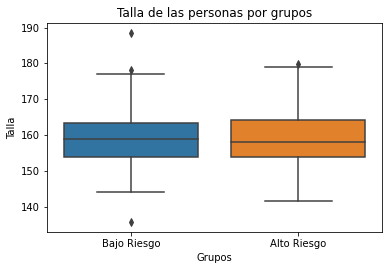

In [ ]:
# Creamos el boxplot para la talla
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 3.84))
g=sns.boxplot(
        x     = 'Grupos',  
        y     = 'talla',  
        data  = df1,   
        ax    = ax
    )
g.set_xlabel("Grupos")
g.set_ylabel("Talla")
g.set_title("Talla de las personas por grupos")

Text(0.5, 1.0, 'Peso de las personas por grupos')

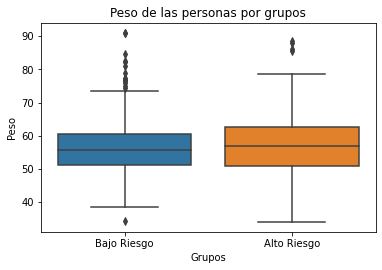

In [ ]:
# Creamos el boxplot para el peso
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 3.84))
g=sns.boxplot(
        x     = 'Grupos',  
        y     = 'peso_kg',  
        data  = df1,   
        ax    = ax
    )
g.set_xlabel("Grupos")
g.set_ylabel("Peso")
g.set_title("Peso de las personas por grupos")

Text(0.5, 1.0, 'IMC de las personas por grupos')

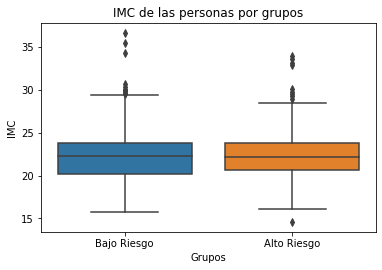

In [ ]:
# Creamos el boxplot para el IMC
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 3.84))
g=sns.boxplot(
        x     = 'Grupos',  
        y     = 'IMC',  
        data  = df1,   
        ax    = ax
    )
g.set_xlabel("Grupos")
g.set_ylabel("IMC")
g.set_title("IMC de las personas por grupos")

Text(0.5, 1.0, 'Medida de cadera de las personas por grupos')

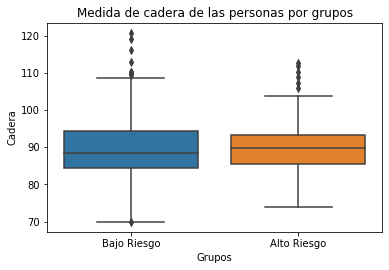

In [ ]:
# Creamos el boxplot para la medida de la cadera
import seaborn as sns
fig, ax = plt.subplots(figsize=(6, 3.84))
g=sns.boxplot(
        x     = 'Grupos',  
        y     = 'cadera',  
        data  = df1,   
        ax    = ax
    )
g.set_xlabel("Grupos")
g.set_ylabel("Cadera")
g.set_title("Medida de cadera de las personas por grupos")

In [ ]:
# Generamos el rango intercuartilico
def rango_intercuartil(x: pd.Series):
    #Obtenemos los "Quartiles"
    Q1 = x.quantile([.25]).values[0]
    Q3 = x.quantile([.75]).values[0]
    return Q1, Q3 - Q1, Q3
rang_int= df[var_num].apply(rango_intercuartil, axis=0).T 
rang_int.columns = ["Q1","RIC","Q3"]
rang_int

,Q1,RIC,Q3
talla,153.7000,10.000,163.7000
edad,14.0000,1.000,15.0000
peso_kg,51.0000,10.700,61.7000
circun_cuello,30.7000,2.800,33.5000
IMC,20.2775,3.635,23.9125
circun_cintura,70.0000,8.000,78.0000
cadera,85.0000,9.000,94.0000
ind_cintura_cadera,0.7900,0.080,0.8700
ind_cintura_estatura,0.4400,0.050,0.4900
por_grasa_corporal,15.9700,14.100,30.0700


In [ ]:
# Generamos la varianza
df1[var_num].apply(np.var, axis=0).round(2)

talla                          53.43
edad                            0.77
peso_kg                        71.12
circun_cuello                   4.44
IMC                             9.10
circun_cintura                 46.66
cadera                         51.52
ind_cintura_cadera              0.00
ind_cintura_estatura            0.00
por_grasa_corporal             61.50
masa_corporal_magra_kg         47.64
pliegue_cutaneo_BICEPS         21.98
pliegue_cutaneo_TRICEPS        32.36
pliegue_cutaneo_ESCAPULAR      28.13
pliegue_cutaneo_SUPRAILIACO    35.39
dtype: float64

In [ ]:
# Generamos la desviación estandar
df1[var_num].apply(np.std, axis=0).round(2)

talla                          7.31
edad                           0.88
peso_kg                        8.43
circun_cuello                  2.11
IMC                            3.02
circun_cintura                 6.83
cadera                         7.18
ind_cintura_cadera             0.05
ind_cintura_estatura           0.05
por_grasa_corporal             7.84
masa_corporal_magra_kg         6.90
pliegue_cutaneo_BICEPS         4.69
pliegue_cutaneo_TRICEPS        5.69
pliegue_cutaneo_ESCAPULAR      5.30
pliegue_cutaneo_SUPRAILIACO    5.95
dtype: float64

In [ ]:
# Generamos el coeficiente de variación
def coeficiente_variacion(x):
  m = stats.mean(x)
  sd = np.std(x)
  return sd/m*100
df1[var_num].apply(coeficiente_variacion, axis=0).round(2), "Porciento %"

(talla                           4.60
 edad                            5.94
 peso_kg                        14.81
 circun_cuello                   6.55
 IMC                            13.45
 circun_cintura                  9.17
 cadera                          7.99
 ind_cintura_cadera              6.55
 ind_cintura_estatura            9.81
 por_grasa_corporal             33.32
 masa_corporal_magra_kg         15.91
 pliegue_cutaneo_BICEPS         51.77
 pliegue_cutaneo_TRICEPS        36.35
 pliegue_cutaneo_ESCAPULAR      36.87
 pliegue_cutaneo_SUPRAILIACO    40.53
 dtype: float64, 'Porciento %')

In [ ]:
# Generamos el cuartil 90 para la talla, y asi se puede hacer para las demas variables
Q = df1["talla"].quantile([.90])
print("Mínimo:", min(df1["talla"].round(2)))
print('Cuantil -->', round(Q, 2))
print("Máximo:", max(df1["talla"].round(2)))

Mínimo: 135.6
Cuantil --> 0.9    169.16
Name: talla, dtype: float64
Máximo: 188.6


In [ ]:
# Generamos el cuartil 80 para la masa corporal, y asi se puede hacer para las demas variables
Q = df1["IMC"].quantile([.80])
print("Mínimo:", min(df1["IMC"].round(2)))
print('Cuantil -->', round(Q, 2))
print("Máximo:", max(df1["IMC"].round(2)))

Mínimo: 14.54
Cuantil --> 0.8    24.44
Name: IMC, dtype: float64
Máximo: 36.71


In [ ]:
# Generamos la curtosis
from scipy.stats import kurtosis
def kurtosis_data(x):
  curtosis =  kurtosis(x, fisher=True)
  if curtosis >0:
    return ('Es Leptocúrtica-->', round(curtosis,2 ))
  elif curtosis ==0: # 0.03
    return  ('Es Mesocúrtica-->', round(curtosis,2 ))
  else:
    return  ('Es Platicúrtica-->', round(curtosis,2 ))
df1[var_num].apply(kurtosis_data, axis=0).T

,0,1
talla,Es Leptocúrtica-->,0.08
edad,Es Platicúrtica-->,-0.61
peso_kg,Es Leptocúrtica-->,1.41
circun_cuello,Es Leptocúrtica-->,0.34
IMC,Es Leptocúrtica-->,1.94
circun_cintura,Es Leptocúrtica-->,1.64
cadera,Es Leptocúrtica-->,1.27
ind_cintura_cadera,Es Leptocúrtica-->,0.4
ind_cintura_estatura,Es Leptocúrtica-->,1.62
por_grasa_corporal,Es Platicúrtica-->,-1.11


In [ ]:
# Correlación de Pearson y Spearman
# gráfico de puntos y curvas
plt.figure(figsize=(6,4))
sns.pairplot(df1[var_num], diag_kind='kde');

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Correlación de Pearson 
pears_corr = df1[var_num].corr(method='pearson').round(3)  
pears_corr

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
talla,1.000,0.101,0.461,0.185,-0.149,0.163,0.024,0.196,-0.302,-0.505,0.748,-0.351,-0.356,-0.258,-0.305
edad,0.101,1.000,0.131,0.072,0.135,0.151,0.163,0.016,0.103,0.070,0.086,-0.018,0.039,0.076,0.059
peso_kg,0.461,0.131,1.000,0.752,0.745,0.776,0.689,0.280,0.543,0.202,0.772,0.258,0.346,0.481,0.410
circun_cuello,0.185,0.072,0.752,1.000,0.757,0.692,0.494,0.393,0.591,0.112,0.623,0.170,0.292,0.466,0.369
IMC,-0.149,0.135,0.745,0.757,1.000,0.768,0.780,0.169,0.826,0.591,0.308,0.540,0.664,0.741,0.680
circun_cintura,0.163,0.151,0.776,0.692,0.768,1.000,0.698,0.532,0.852,0.347,0.489,0.343,0.440,0.595,0.523
cadera,0.024,0.163,0.689,0.494,0.780,0.698,1.000,-0.195,0.667,0.620,0.239,0.488,0.677,0.654,0.657
ind_cintura_cadera,0.196,0.016,0.280,0.393,0.169,0.532,-0.195,1.000,0.415,-0.247,0.406,-0.100,-0.180,0.077,-0.040
ind_cintura_estatura,-0.302,0.103,0.543,0.591,0.826,0.852,0.667,0.415,1.000,0.567,0.132,0.494,0.591,0.695,0.648
por_grasa_corporal,-0.505,0.070,0.202,0.112,0.591,0.347,0.620,-0.247,0.567,1.000,-0.434,0.797,0.877,0.755,0.839


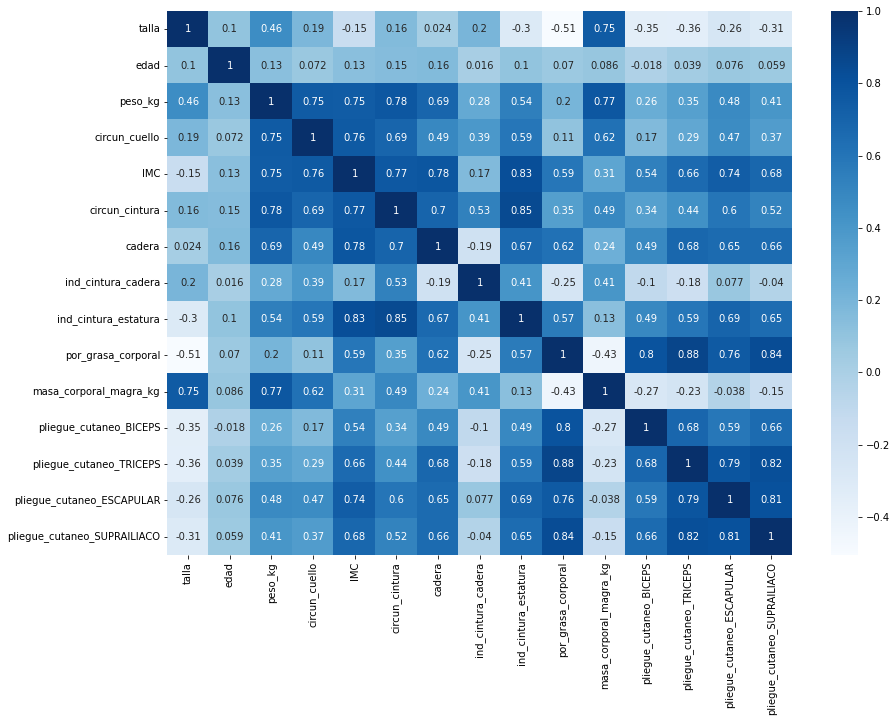

In [ ]:
# Generamos el nuevo mapa de calor con correlaciones a partir de df1 para Pearson: Parametrico
plt.figure(figsize=(14, 10))
correlacion = df1.corr() 
sns.heatmap(correlacion,
            xticklabels = correlacion.columns.values,
            yticklabels = correlacion.columns.values,
            annot = True,
            cmap = "Blues" 
            );

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


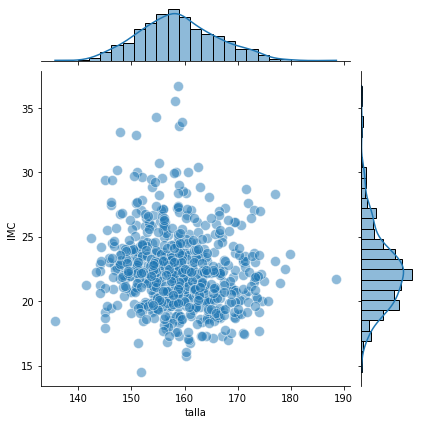

In [ ]:
# Generamos un scatter para la talla y el IMC con sus respectivas distribuciones
g = sns.JointGrid(x="talla", y="IMC", data=df1, size=6)
g.plot_joint(sns.scatterplot, s=100, alpha=.5) 
g.plot_marginals(sns.histplot, kde=True)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


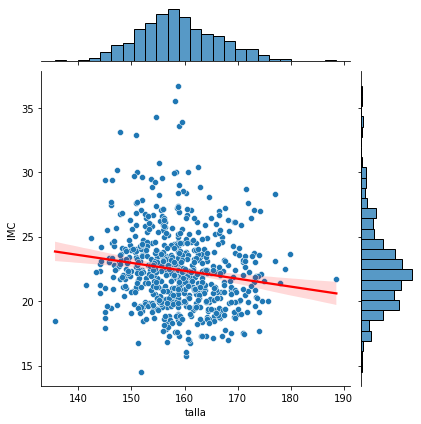

In [ ]:
# Generamos con linea de tendencia mediante una regresión lineal
g=sns.jointplot(x=df1['talla'], y=df1['IMC'])
sns.regplot(df1['talla'], df1['IMC'], ax=g.ax_joint, scatter=False, color= 'red');

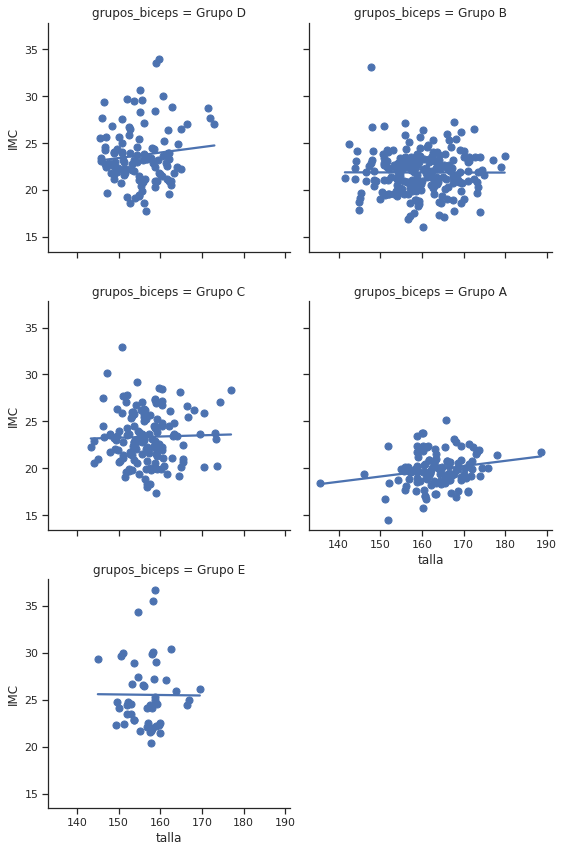

In [ ]:
# Generamos el grafico por grupos 
sns.set(style="ticks")
sns.lmplot(x="talla", y="IMC", col='grupos_biceps', data=df1,
               col_wrap=2, ci=None, palette="muted", height=4,
               scatter_kws={"s": 50, "alpha": 1});

In [ ]:
# Correlación de Spearman 
Rho = df1[var_num].corr(method='spearman').round(3) 
Rho

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
talla,1.000,0.089,0.448,0.180,-0.185,0.151,-0.038,0.220,-0.340,-0.496,0.740,-0.420,-0.404,-0.305,-0.344
edad,0.089,1.000,0.125,0.088,0.140,0.137,0.138,0.018,0.085,0.061,0.077,-0.017,0.040,0.077,0.055
peso_kg,0.448,0.125,1.000,0.739,0.702,0.764,0.632,0.286,0.474,0.241,0.747,0.197,0.311,0.450,0.378
circun_cuello,0.180,0.088,0.739,1.000,0.745,0.679,0.453,0.377,0.549,0.173,0.614,0.132,0.258,0.421,0.319
IMC,-0.185,0.140,0.702,0.745,1.000,0.732,0.737,0.140,0.787,0.646,0.252,0.540,0.671,0.754,0.696
circun_cintura,0.151,0.137,0.764,0.679,0.732,1.000,0.669,0.512,0.820,0.380,0.474,0.301,0.412,0.593,0.496
cadera,-0.038,0.138,0.632,0.453,0.737,0.669,1.000,-0.208,0.639,0.654,0.165,0.511,0.674,0.652,0.670
ind_cintura_cadera,0.220,0.018,0.286,0.377,0.140,0.512,-0.208,1.000,0.359,-0.229,0.439,-0.161,-0.221,0.050,-0.087
ind_cintura_estatura,-0.340,0.085,0.474,0.549,0.787,0.820,0.639,0.359,1.000,0.611,0.072,0.502,0.595,0.718,0.657
por_grasa_corporal,-0.496,0.061,0.241,0.173,0.646,0.380,0.654,-0.229,0.611,1.000,-0.399,0.862,0.910,0.825,0.878


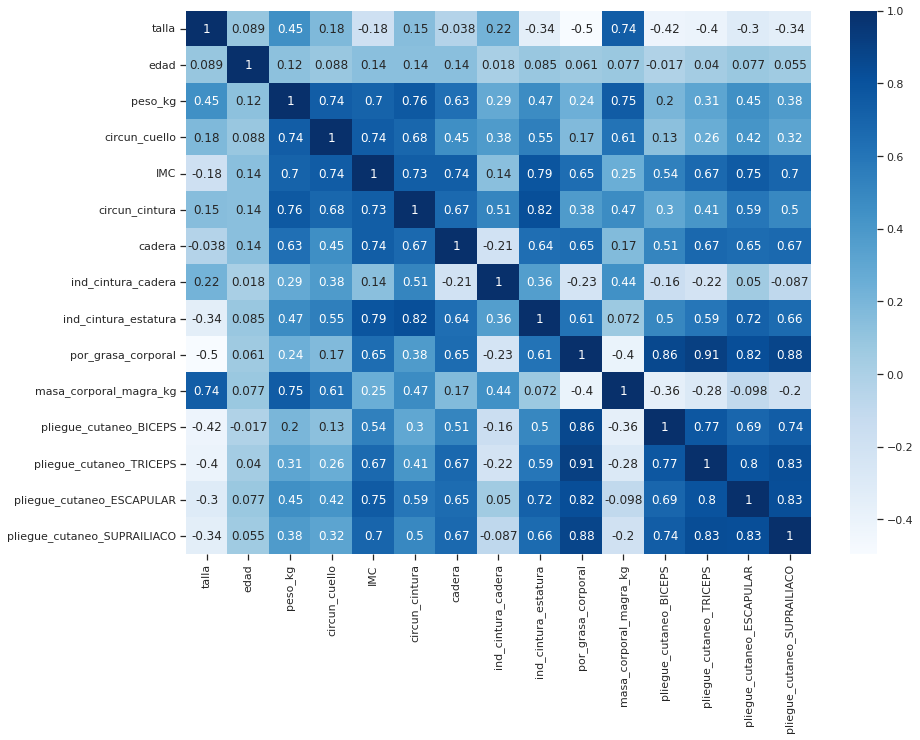

In [ ]:
# Generamos el nuevo mapa de calor con correlaciones a partir de df1 para Spearman: no parametrico 
plt.figure(figsize=(14, 10))
correlacion_s = df1.corr(method='spearman').round(3) 
sns.heatmap(correlacion_s,
            xticklabels = correlacion_s.columns.values,
            yticklabels = correlacion_s.columns.values,
            annot = True,
            cmap = "Blues" 
            );

### **Entregable 2:** 
#### Aplicar Estadística Inferencial - Trabajar hasta con 5 variables (seleccionar las variables a preferencia).

In [ ]:
# Importamos las librerias necesarias para el 
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

In [ ]:
# Verificamos el dataframe nuevamente
df1

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,...,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,grupos_biceps,grupos_triceps,grupos_escapular,grupos_suprailiaco
0,Persona 1,155.7,16,71.2,35.7,29.58,90.0,98.0,0.92,0.58,...,45.25,13.0,27.0,32.0,34.0,Bajo Riesgo,Grupo D,Grupo E,Grupo E,Grupo E
1,Persona 2,166.5,16,61.0,31.8,22.36,80.9,100.5,0.80,0.49,...,43.44,5.0,19.0,15.0,22.0,Bajo Riesgo,Grupo B,Grupo D,Grupo C,Grupo E
2,Persona 3,151.3,16,49.1,30.5,21.62,72.0,86.0,0.84,0.48,...,34.44,13.0,18.0,18.0,17.0,Bajo Riesgo,Grupo D,Grupo D,Grupo D,Grupo D
3,Persona 4,151.7,16,54.6,32.6,23.12,74.5,88.4,0.84,0.49,...,39.38,5.0,19.0,15.0,18.0,Bajo Riesgo,Grupo B,Grupo D,Grupo C,Grupo D
4,Persona 5,160.3,16,58.0,30.1,22.26,74.5,97.9,0.81,0.50,...,40.44,10.0,19.0,20.0,19.0,Bajo Riesgo,Grupo C,Grupo D,Grupo E,Grupo D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Persona 648,165.5,14,88.0,32.5,21.03,72.5,85.0,0.85,0.44,...,71.10,12.0,13.0,12.0,13.0,Alto Riesgo,Grupo C,Grupo C,Grupo C,Grupo C
648,Persona 649,144.2,14,48.6,31.5,23.13,73.0,87.5,0.83,0.51,...,34.72,8.0,18.0,18.0,16.0,Alto Riesgo,Grupo B,Grupo D,Grupo D,Grupo C
649,Persona 650,154.0,15,58.9,31.5,22.77,85.0,96.0,0.89,0.55,...,43.22,8.0,12.0,14.0,18.0,Alto Riesgo,Grupo B,Grupo C,Grupo C,Grupo D
650,Persona 651,174.3,14,88.7,37.0,27.02,85.8,101.0,0.85,0.49,...,68.81,11.0,16.0,18.0,20.0,Alto Riesgo,Grupo C,Grupo D,Grupo D,Grupo E


In [ ]:
# Generamos el dataframe nuevamente con variables numericas
df2 = pd.DataFrame(data=df1, columns=['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura', 'por_grasa_corporal', 'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    int64  
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [ ]:
# Checamos nuevamente que no haya datos nulos aunque ya lo hayamos verificado anteriormente 
df2.isnull().sum()

talla                          0
edad                           0
peso_kg                        0
circun_cuello                  0
IMC                            0
circun_cintura                 0
cadera                         0
ind_cintura_cadera             0
ind_cintura_estatura           0
por_grasa_corporal             0
masa_corporal_magra_kg         0
pliegue_cutaneo_BICEPS         0
pliegue_cutaneo_TRICEPS        0
pliegue_cutaneo_ESCAPULAR      0
pliegue_cutaneo_SUPRAILIACO    0
dtype: int64

In [ ]:
# Nuevamente poderemos revisar las variable con un analisis descriptivo rapido de media y desviación estandar 
#data_riesgo_f = data_riesgo_f.fillna(0)
percentiles = [.1, .25, .5, .75, .9]
Descrip = df2.describe(percentiles=percentiles).T
Descrip

,count,mean,std,min,10%,25%,50%,75%,90%,max
talla,652.0,158.820552,7.315334,135.60,149.700,153.8000,158.80,163.3000,169.160,188.60
edad,652.0,14.768405,0.878161,12.00,14.000,14.0000,15.00,15.0000,16.000,17.00
peso_kg,652.0,56.942025,8.439781,33.90,47.600,51.2000,56.10,61.4500,68.060,91.10
circun_cuello,652.0,32.136350,2.108154,24.50,29.500,30.7000,32.10,33.5000,34.800,39.20
IMC,652.0,22.425782,3.018632,14.54,18.985,20.3100,22.19,23.8550,26.429,36.71
circun_cintura,652.0,74.517025,6.835841,55.00,66.820,70.0000,73.90,78.0000,83.500,107.50
cadera,652.0,89.868712,7.182996,69.80,81.500,85.0000,89.00,94.0000,99.000,120.80
ind_cintura_cadera,652.0,0.830629,0.054447,0.65,0.760,0.8000,0.83,0.8700,0.900,1.03
ind_cintura_estatura,652.0,0.471426,0.046304,0.36,0.420,0.4400,0.47,0.5000,0.530,0.70
por_grasa_corporal,652.0,23.538865,7.848439,4.21,12.260,16.1300,26.09,30.0700,32.340,39.45


In [ ]:
# Analisis de normalidad 
# Ho: Los datos estan normalmente distribuidos
# Ha: Los datos no estan normalmente distribuidos
# Nivel de significancia = 5%
# Importamos las librerias a utilizar 
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro # n <= 50
from scipy.stats import kstest  # n > 50
from scipy.stats import zscore

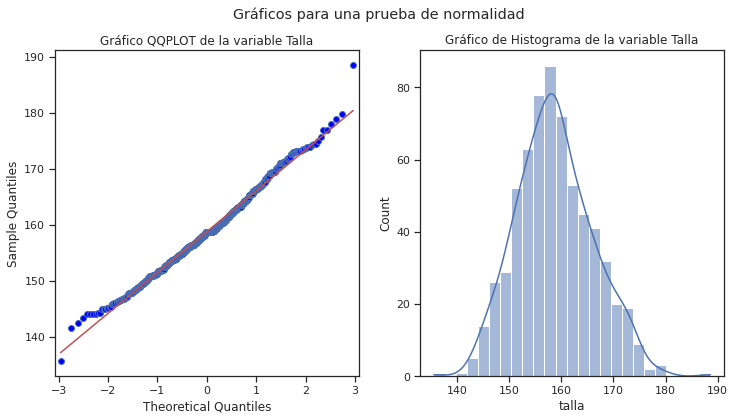

In [ ]:
# Podemos revisar antes la distribución de las variables elegidas, aunque su resultado no es concluyente. 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')
axes[0].set_title('Gráfico QQPLOT de la variable Talla')
axes[1].set_title('Gráfico de Histograma de la variable Talla')
qqplot(df2['talla'] , line='s', ax=axes[0])
sns.histplot(x='talla', data=df2, ax=axes[1], kde= True)
plt.show()
# Podemos concluir, por la distribución de los puntos sobre la linea del qqplot, que es posible que no exista una distribución normal, 
# ya que la hay algunos puntos que no estan sobre la trayectoria de la linea. 

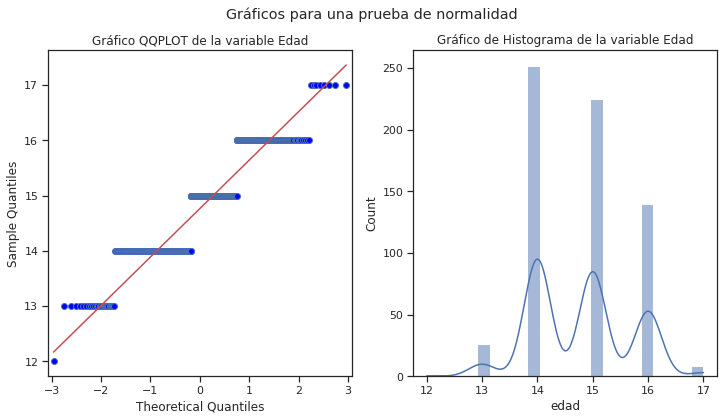

In [ ]:
# Podemos revisar antes la distribución de las variables elegidas, aunque su resultado no es concluyente. 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')
axes[0].set_title('Gráfico QQPLOT de la variable Edad')
axes[1].set_title('Gráfico de Histograma de la variable Edad')
qqplot(df2['edad'] , line='s', ax=axes[0])
sns.histplot(x='edad', data=df2, ax=axes[1], kde= True)
plt.show()
# Podemos concluir, por la distribución de los puntos sobre la linea del qqplot, que es posible que no exista una distribución normal, 
# ya que la distribución de los puntos a lo largo de la linea es uniforme, no todos los puntos estan sobre la linea. 

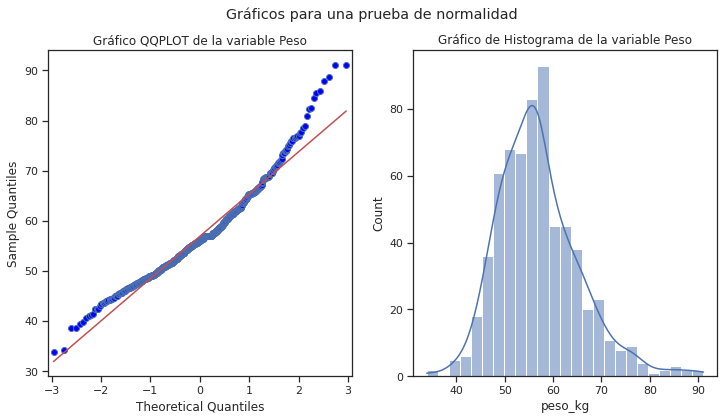

In [ ]:
# Podemos revisar antes la distribución de las variables elegidas, aunque su resultado no es concluyente. 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')
axes[0].set_title('Gráfico QQPLOT de la variable Peso')
axes[1].set_title('Gráfico de Histograma de la variable Peso')
qqplot(df2['peso_kg'] , line='s', ax=axes[0])
sns.histplot(x='peso_kg', data=df2, ax=axes[1], kde= True)
plt.show()
# Podemos concluir, por la distribución de los puntos sobre la linea del qqplot, que es posible que no exista una distribución normal, 
# ya que la distribución de los puntos a lo largo de la linea es uniforme, no todos los puntos estan sobre la linea.

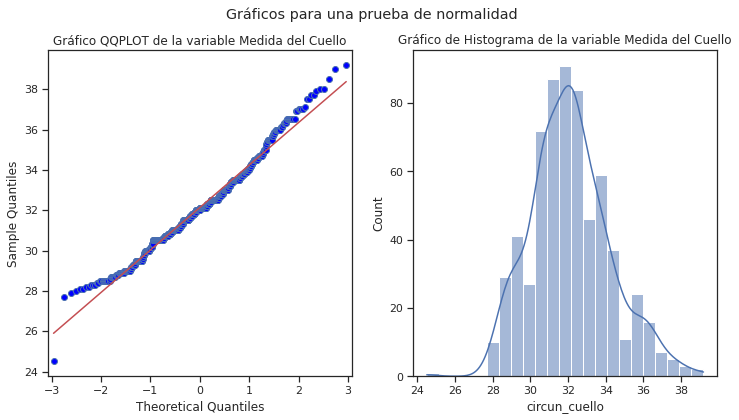

In [ ]:
# Podemos revisar antes la distribución de las variables elegidas, aunque su resultado no es concluyente. 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')
axes[0].set_title('Gráfico QQPLOT de la variable Medida del Cuello')
axes[1].set_title('Gráfico de Histograma de la variable Medida del Cuello')
qqplot(df2['circun_cuello'] , line='s', ax=axes[0])
sns.histplot(x='circun_cuello', data=df2, ax=axes[1], kde= True)
plt.show()
# Podemos concluir, por la distribución de los puntos sobre la linea del qqplot, que es posible que no exista una distribución normal, 
# ya que la distribución de los puntos a lo largo de la linea es uniforme, no todos los puntos estan sobre la linea. 

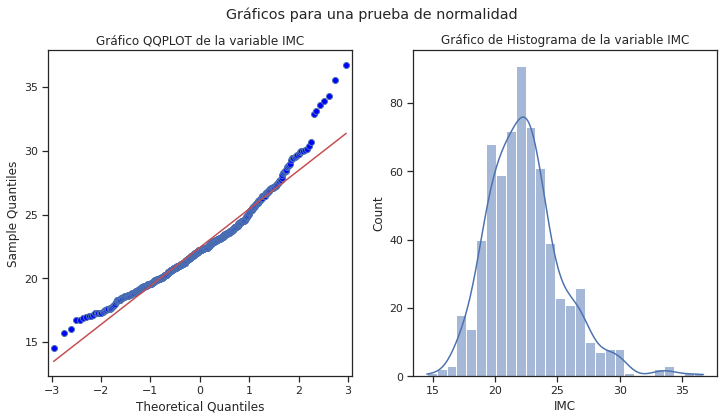

In [ ]:
# Podemos revisar antes la distribución de las variables elegidas, aunque su resultado no es concluyente. 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')
axes[0].set_title('Gráfico QQPLOT de la variable IMC')
axes[1].set_title('Gráfico de Histograma de la variable IMC')
qqplot(df2['IMC'] , line='s', ax=axes[0])
sns.histplot(x='IMC', data=df2, ax=axes[1], kde= True)
plt.show()
# Podemos concluir, por la distribución de los puntos sobre la linea del qqplot, que es posible que no exista una distribución normal del,
# indice de masa corporal, ya que la distribución de los puntos a lo largo de la linea es uniforme, no todos los puntos estan sobre la linea. 

In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2['talla'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=1.000, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2['edad'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=1.000, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2['peso_kg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=1.000, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2['circun_cuello'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos

Estadisticos=1.000, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2['IMC'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos

Estadisticos=1.000, p-value=0.000


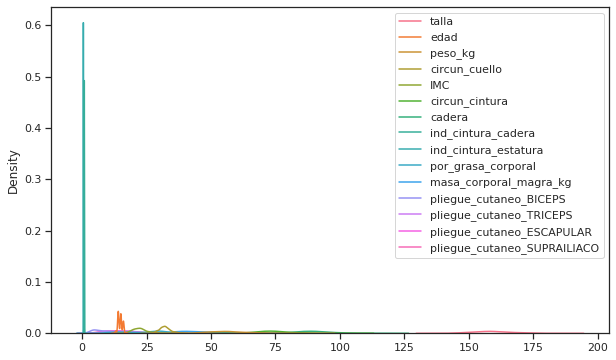

In [ ]:
# Visualizamos sin normalizar una vez aplicadas y confirmada la ausencia de normalidad en los datos 
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df1)
plt.show()

In [ ]:
# Escalado del dataframe con las variables cuyos valores estaran entre 0 y 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2_norm = scaler.fit_transform(df2)
df2_norm

array([[0.37924528, 0.8       , 0.6520979 , ..., 0.64705882, 0.9       ,
        0.96875   ],
       [0.58301887, 0.8       , 0.47377622, ..., 0.41176471, 0.33333333,
        0.59375   ],
       [0.29622642, 0.8       , 0.26573427, ..., 0.38235294, 0.43333333,
        0.4375    ],
       ...,
       [0.34716981, 0.6       , 0.43706294, ..., 0.20588235, 0.3       ,
        0.46875   ],
       [0.73018868, 0.4       , 0.95804196, ..., 0.32352941, 0.43333333,
        0.53125   ],
       [0.42264151, 0.4       , 0.41433566, ..., 0.55882353, 0.5       ,
        0.65625   ]])

In [ ]:
# Convertimos el array en dataframe 
df2_norm = pd.DataFrame(data=df2_norm, columns=['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura', 'por_grasa_corporal', 'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'])
df2_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [ ]:
# Checamos el dataframe escalado
df2_norm

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,0.379245,0.8,0.652098,0.761905,0.678394,0.666667,0.552941,0.710526,0.647059,0.914869,0.388902,0.458333,0.647059,0.900000,0.96875
1,0.583019,0.8,0.473776,0.496599,0.352729,0.493333,0.601961,0.394737,0.382353,0.697503,0.346877,0.125000,0.411765,0.333333,0.59375
2,0.296226,0.8,0.265734,0.408163,0.319350,0.323810,0.317647,0.500000,0.352941,0.728150,0.137915,0.458333,0.382353,0.433333,0.43750
3,0.303774,0.8,0.361888,0.551020,0.387009,0.371429,0.364706,0.500000,0.382353,0.671396,0.252612,0.125000,0.411765,0.333333,0.46875
4,0.466038,0.8,0.421329,0.380952,0.348218,0.371429,0.550980,0.421053,0.411765,0.739784,0.277223,0.333333,0.411765,0.500000,0.50000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.564151,0.4,0.945804,0.544218,0.292738,0.333333,0.298039,0.526316,0.235294,0.425653,0.989088,0.416667,0.235294,0.233333,0.31250
648,0.162264,0.4,0.256993,0.476190,0.387461,0.342857,0.347059,0.473684,0.441176,0.691260,0.144416,0.250000,0.382353,0.433333,0.40625
649,0.347170,0.6,0.437063,0.476190,0.371222,0.571429,0.513725,0.631579,0.558824,0.635925,0.341769,0.250000,0.205882,0.300000,0.46875
650,0.730189,0.4,0.958042,0.850340,0.562923,0.586667,0.611765,0.526316,0.382353,0.516742,0.935918,0.375000,0.323529,0.433333,0.53125


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2_norm['talla'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=0.557, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2_norm['edad'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=0.614, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2_norm['peso_kg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=0.545, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2_norm['circun_cuello'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=0.591, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2_norm['IMC'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos
# Tambien se hizo para el resto de las variables pero tampoco tienen una distribución normal

Estadisticos=0.535, p-value=0.000


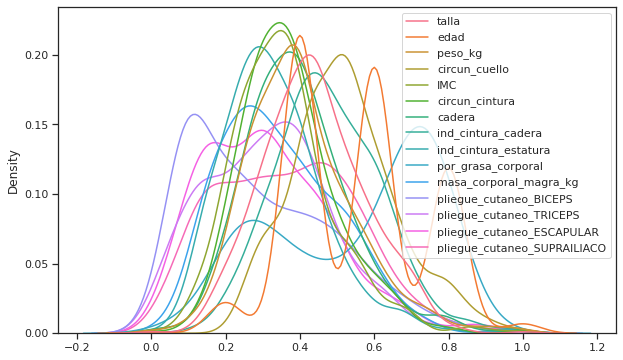

In [ ]:
# Visualizamos datos escalados
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df2_norm)
plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


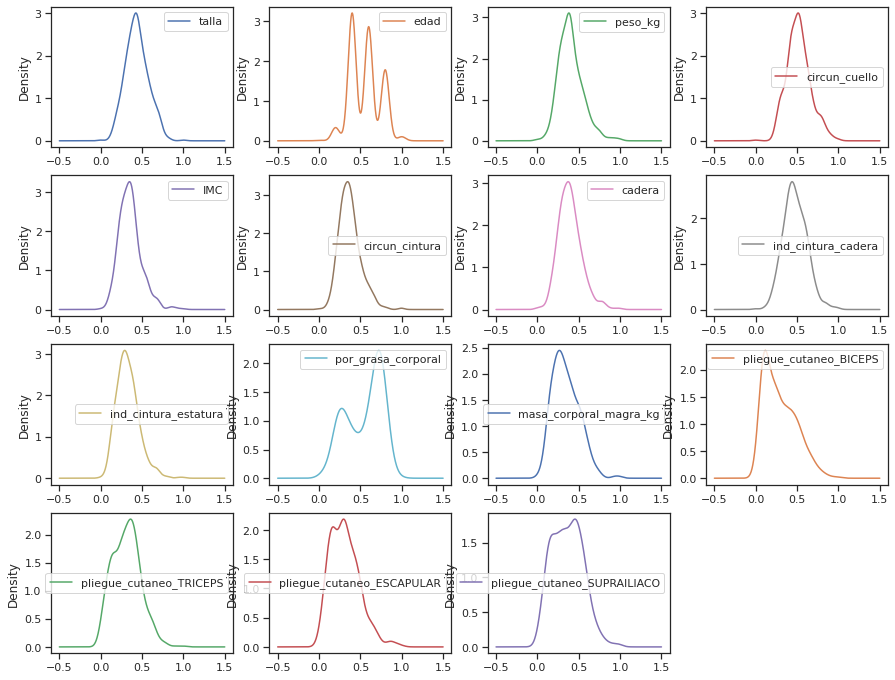

In [ ]:
# Visualizamos las variables con datos escalados (normalizados)
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
df2_norm.plot(ax=ax, kind='density', subplots=True, layout=(5,4), sharex=False)
plt.show()

In [ ]:
# Podemos estandarizar las variables como alternativa para generar distribuciones normales
df2_estand = zscore(df2_norm, axis=1)
df2_estand

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,-1.704009,0.719240,-0.132571,0.499838,0.018877,-0.048665,-0.703644,0.203935,-0.161593,1.380807,-1.648394,-1.248518,-0.161593,1.295169,1.691121
1,0.685122,2.029598,0.008224,0.149638,-0.741819,0.129405,0.802491,-0.481526,-0.558260,1.394497,-0.778078,-2.152891,-0.376017,-0.862000,0.751615
2,-0.700491,2.380503,-0.886976,-0.015904,-0.559068,-0.531797,-0.569486,0.545754,-0.353633,1.941079,-1.668697,0.290927,-0.173756,0.138032,0.163514
3,-0.723049,2.390722,-0.358386,0.828400,-0.200752,-0.298521,-0.340705,0.508252,-0.229971,1.583746,-1.044083,-1.844835,-0.045415,-0.537564,0.312162
4,0.027230,2.433127,-0.294858,-0.585733,-0.821553,-0.654344,0.639165,-0.296847,-0.363758,1.999327,-1.333009,-0.928785,-0.363758,0.271898,0.271898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.497377,-0.218875,2.162674,0.410401,-0.686900,-0.509767,-0.663768,0.332288,-0.937549,-0.106943,2.351535,-0.146152,-0.937549,-0.946104,-0.600670
648,-1.602893,0.205197,-0.882437,0.784660,0.109828,-0.229401,-0.197445,0.765599,0.518363,2.420362,-1.738636,-0.935622,0.070983,0.458712,0.252731
649,-0.743086,1.133181,-0.075984,0.214384,-0.564591,0.921151,0.492933,1.367530,0.827608,1.399783,-0.783164,-1.464188,-1.791588,-1.093136,0.159167
650,0.757759,-0.926384,1.919936,1.370597,-0.095388,0.025718,0.153732,-0.282105,-1.016394,-0.330934,1.807093,-1.053898,-1.316426,-0.756366,-0.256937


In [ ]:
# Generamos el dataframe 
df2_estand = pd.DataFrame(data=df2_estand, columns=['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura', 'por_grasa_corporal', 'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'])
df2_estand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [ ]:
# Visualizamos la estructura del dataframe 
df2_estand

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,-1.704009,0.719240,-0.132571,0.499838,0.018877,-0.048665,-0.703644,0.203935,-0.161593,1.380807,-1.648394,-1.248518,-0.161593,1.295169,1.691121
1,0.685122,2.029598,0.008224,0.149638,-0.741819,0.129405,0.802491,-0.481526,-0.558260,1.394497,-0.778078,-2.152891,-0.376017,-0.862000,0.751615
2,-0.700491,2.380503,-0.886976,-0.015904,-0.559068,-0.531797,-0.569486,0.545754,-0.353633,1.941079,-1.668697,0.290927,-0.173756,0.138032,0.163514
3,-0.723049,2.390722,-0.358386,0.828400,-0.200752,-0.298521,-0.340705,0.508252,-0.229971,1.583746,-1.044083,-1.844835,-0.045415,-0.537564,0.312162
4,0.027230,2.433127,-0.294858,-0.585733,-0.821553,-0.654344,0.639165,-0.296847,-0.363758,1.999327,-1.333009,-0.928785,-0.363758,0.271898,0.271898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.497377,-0.218875,2.162674,0.410401,-0.686900,-0.509767,-0.663768,0.332288,-0.937549,-0.106943,2.351535,-0.146152,-0.937549,-0.946104,-0.600670
648,-1.602893,0.205197,-0.882437,0.784660,0.109828,-0.229401,-0.197445,0.765599,0.518363,2.420362,-1.738636,-0.935622,0.070983,0.458712,0.252731
649,-0.743086,1.133181,-0.075984,0.214384,-0.564591,0.921151,0.492933,1.367530,0.827608,1.399783,-0.783164,-1.464188,-1.791588,-1.093136,0.159167
650,0.757759,-0.926384,1.919936,1.370597,-0.095388,0.025718,0.153732,-0.282105,-1.016394,-0.330934,1.807093,-1.053898,-1.316426,-0.756366,-0.256937


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2_estand['talla'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=0.118, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2_estand['edad'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=0.384, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2_estand['peso_kg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=0.147, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2_estand['circun_cuello'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 

Estadisticos=0.365, p-value=0.000


In [ ]:
# Checamos con kstest ya que tenemos una muestra de 652 obs, es decir, n>50
stat2, p2 = kstest(df2_estand['IMC'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Los datos no estan normalmente distribuidos 
# Se realizo para el resto de las variables y tampoco presentan una distribución normal

Estadisticos=0.336, p-value=0.000


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


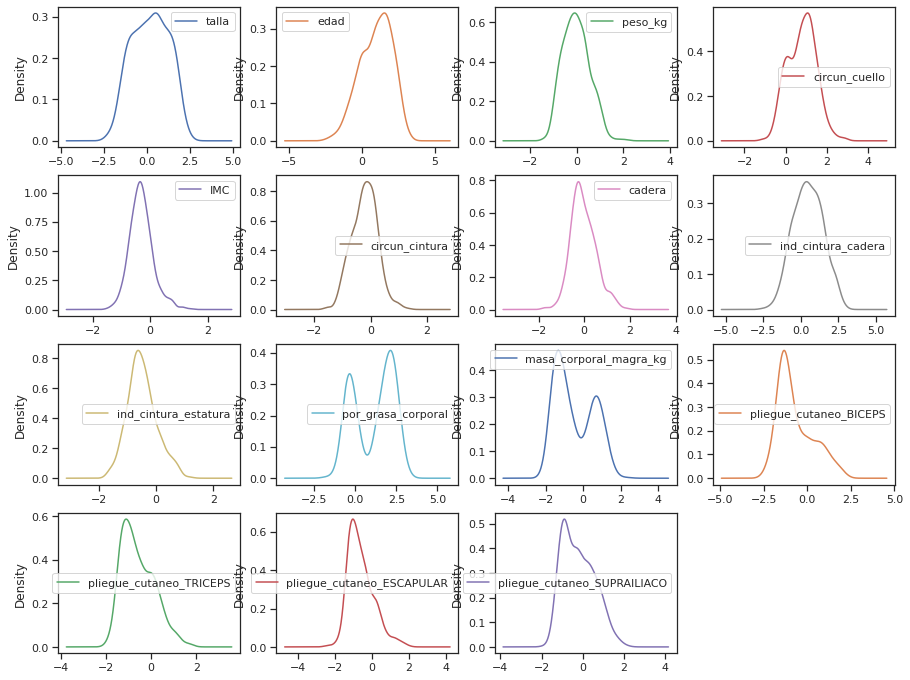

In [ ]:
# Visualizamos las variables con datos estandarizados
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
df2_estand.plot(ax=ax, kind='density', subplots=True, layout=(5,4), sharex=False)
plt.show()

In [ ]:
# Normalización con sklearn
from sklearn.preprocessing import StandardScaler
skler = StandardScaler()
df2_skler = skler.fit_transform(df2)
df2_skler

array([[-0.42690437,  1.40354805,  1.69067442, ...,  1.9958441 ,
         3.32175318,  3.2475333 ],
       [ 1.05058006,  1.40354805,  0.4811844 , ...,  0.58942383,
         0.11625847,  1.23048952],
       [-1.02884247,  1.40354805, -0.9298873 , ...,  0.4136213 ,
         0.68193401,  0.39005461],
       ...,
       [-0.65947136,  0.26392996,  0.23217174, ..., -0.6411939 ,
        -0.07230004,  0.55814159],
       [ 2.11765214, -0.87568813,  3.76577986, ...,  0.06201623,
         0.68193401,  0.89431555],
       [-0.11225491, -0.87568813,  0.07802105, ...,  1.4684365 ,
         1.05905103,  1.56666348]])

In [ ]:
# Revisamos una de las columnas
np.var(df2_skler[:, 1])

0.9999999999999997

In [ ]:
# Generamos el dataframe 
df2_skler = pd.DataFrame(data=df2_skler, columns=['talla', 'edad', 'peso_kg', 'circun_cuello', 'IMC', 'circun_cintura', 'cadera', 'ind_cintura_cadera', 'ind_cintura_estatura', 'por_grasa_corporal', 'masa_corporal_magra_kg', 'pliegue_cutaneo_BICEPS', 'pliegue_cutaneo_TRICEPS', 'pliegue_cutaneo_ESCAPULAR', 'pliegue_cutaneo_SUPRAILIACO'])
df2_skler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   talla                        652 non-null    float64
 1   edad                         652 non-null    float64
 2   peso_kg                      652 non-null    float64
 3   circun_cuello                652 non-null    float64
 4   IMC                          652 non-null    float64
 5   circun_cintura               652 non-null    float64
 6   cadera                       652 non-null    float64
 7   ind_cintura_cadera           652 non-null    float64
 8   ind_cintura_estatura         652 non-null    float64
 9   por_grasa_corporal           652 non-null    float64
 10  masa_corporal_magra_kg       652 non-null    float64
 11  pliegue_cutaneo_BICEPS       652 non-null    float64
 12  pliegue_cutaneo_TRICEPS      652 non-null    float64
 13  pliegue_cutaneo_ESCA

In [ ]:
# Visualizamos el nuevo dataframe en su estructura
df2_skler

,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,por_grasa_corporal,masa_corporal_magra_kg,pliegue_cutaneo_BICEPS,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO
0,-0.426904,1.403548,1.690674,1.691710,2.371839,2.266709,1.132888,1.642708,2.346609,1.646321,0.270972,0.841331,1.995844,3.321753,3.247533
1,1.050580,1.403548,0.481184,-0.159669,-0.021809,0.934468,1.481200,-0.562981,0.401433,0.669581,0.008742,-0.865215,0.589424,0.116258,1.230490
2,-1.028842,1.403548,-0.929887,-0.776796,-0.267141,-0.368493,-0.539007,0.172249,0.185302,0.807294,-1.295165,0.841331,0.413621,0.681934,0.390055
3,-0.974121,1.403548,-0.277711,0.220101,0.230154,-0.002492,-0.204628,0.172249,0.401433,0.552270,-0.579465,-0.865215,0.589424,0.116258,0.558142
4,0.202395,1.403548,0.125452,-0.966681,-0.054962,-0.002492,1.118956,-0.379173,0.617563,0.859573,-0.425894,0.201376,0.589424,1.059051,0.726229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,0.913776,-0.875688,3.682776,0.172629,-0.462744,-0.295293,-0.678331,0.356056,-0.679220,-0.551981,4.016081,0.628013,-0.465391,-0.449417,-0.282293
648,-2.000152,-0.875688,-0.989176,-0.302083,0.233469,-0.222093,-0.330020,-0.011558,0.833694,0.641529,-1.254599,-0.225260,0.413621,0.681934,0.221968
649,-0.659471,0.263930,0.232172,-0.302083,0.114119,1.534709,0.854239,1.091286,1.698217,0.392881,-0.023132,-0.225260,-0.641194,-0.072300,0.558142
650,2.117652,-0.875688,3.765780,2.308837,1.523122,1.651829,1.550862,0.356056,0.401433,-0.142668,3.684309,0.414694,0.062016,0.681934,0.894316


In [ ]:
# Checamos con kstest para talla
stat2, p2 = kstest(df2_skler['talla'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# Hay una distribución normal

Estadisticos=0.048, p-value=0.090


In [ ]:
# Checamos con kstest para edad
stat2, p2 = kstest(df2_skler['edad'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# No hay una distribución normal

Estadisticos=0.237, p-value=0.000


In [ ]:
# Checamos con kstest para peso
stat2, p2 = kstest(df2_skler['peso_kg'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# No hay una distribución normal

Estadisticos=0.091, p-value=0.000


In [ ]:
# Checamos con kstest para Medida del cuello 
stat2, p2 = kstest(df2_skler['circun_cuello'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# No hay una distribución normal

Estadisticos=0.073, p-value=0.002


In [ ]:
# Checamos con kstest para IMC
stat2, p2 = kstest(df2_skler['IMC'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# No hay una distribución normal
# Solo una variable, talla, presenta distribución normal ya que el p-value es ligeramente mayor a 0.05. 

Estadisticos=0.073, p-value=0.002


In [ ]:
# Al solo existir una variable una con una distribución normal, es necesario la creación de otras que, para el efecto de este ejercicio, 
# tengan una distribución normal.
import numpy  as np
np.random.seed(123456789)
mu, sigma = 0, 1  
mu1, sigma1 = 0.01, 1.01
x = np.random.normal(mu, sigma, 652)  
y = np.random.normal(mu1, sigma1, 652)
df_random = pd.DataFrame(data=np.transpose([x, y]), columns=["randomX", "randomY"])
df_random

,randomX,randomY
0,2.212902,1.212957
1,2.128398,-0.057404
2,1.841711,0.492281
3,0.082382,2.649143
4,0.858964,0.544812
...,...,...
647,2.734637,0.110309
648,2.362476,0.655412
649,1.860238,-0.999922
650,0.306606,0.864138


In [ ]:
# Concatenamos el dataframe con las variables con distribución normal
df3=pd.concat([df1, df_random], axis=1)
df3

,Individuo,talla,edad,peso_kg,circun_cuello,IMC,circun_cintura,cadera,ind_cintura_cadera,ind_cintura_estatura,...,pliegue_cutaneo_TRICEPS,pliegue_cutaneo_ESCAPULAR,pliegue_cutaneo_SUPRAILIACO,Grupos,grupos_biceps,grupos_triceps,grupos_escapular,grupos_suprailiaco,randomX,randomY
0,Persona 1,155.7,16,71.2,35.7,29.58,90.0,98.0,0.92,0.58,...,27.0,32.0,34.0,Bajo Riesgo,Grupo D,Grupo E,Grupo E,Grupo E,2.212902,1.212957
1,Persona 2,166.5,16,61.0,31.8,22.36,80.9,100.5,0.80,0.49,...,19.0,15.0,22.0,Bajo Riesgo,Grupo B,Grupo D,Grupo C,Grupo E,2.128398,-0.057404
2,Persona 3,151.3,16,49.1,30.5,21.62,72.0,86.0,0.84,0.48,...,18.0,18.0,17.0,Bajo Riesgo,Grupo D,Grupo D,Grupo D,Grupo D,1.841711,0.492281
3,Persona 4,151.7,16,54.6,32.6,23.12,74.5,88.4,0.84,0.49,...,19.0,15.0,18.0,Bajo Riesgo,Grupo B,Grupo D,Grupo C,Grupo D,0.082382,2.649143
4,Persona 5,160.3,16,58.0,30.1,22.26,74.5,97.9,0.81,0.50,...,19.0,20.0,19.0,Bajo Riesgo,Grupo C,Grupo D,Grupo E,Grupo D,0.858964,0.544812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647,Persona 648,165.5,14,88.0,32.5,21.03,72.5,85.0,0.85,0.44,...,13.0,12.0,13.0,Alto Riesgo,Grupo C,Grupo C,Grupo C,Grupo C,2.734637,0.110309
648,Persona 649,144.2,14,48.6,31.5,23.13,73.0,87.5,0.83,0.51,...,18.0,18.0,16.0,Alto Riesgo,Grupo B,Grupo D,Grupo D,Grupo C,2.362476,0.655412
649,Persona 650,154.0,15,58.9,31.5,22.77,85.0,96.0,0.89,0.55,...,12.0,14.0,18.0,Alto Riesgo,Grupo B,Grupo C,Grupo C,Grupo D,1.860238,-0.999922
650,Persona 651,174.3,14,88.7,37.0,27.02,85.8,101.0,0.85,0.49,...,16.0,18.0,20.0,Alto Riesgo,Grupo C,Grupo D,Grupo D,Grupo E,0.306606,0.864138


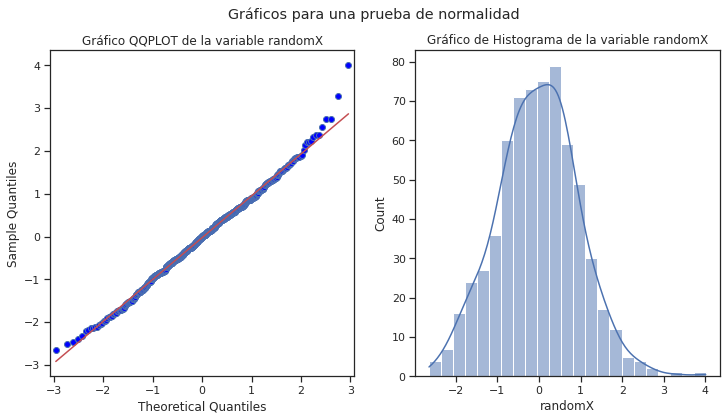

In [ ]:
# Podemos revisar antes la distribución de las variables elegidas, aunque su resultado no es concluyente. 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')
axes[0].set_title('Gráfico QQPLOT de la variable randomX')
axes[1].set_title('Gráfico de Histograma de la variable randomX')
qqplot(df3['randomX'] , line='s', ax=axes[0])
sns.histplot(x='randomX', data=df3, ax=axes[1], kde= True)
plt.show()

In [ ]:
# Checamos con kstest para indice cintura-cadera
stat2, p2 = kstest(df3['randomX'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))

Estadisticos=0.035, p-value=0.407


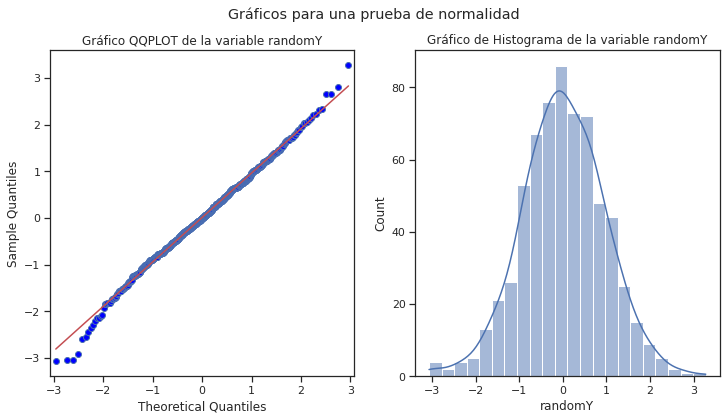

In [ ]:
# Podemos revisar antes la distribución de las variables elegidas, aunque su resultado no es concluyente. 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos para una prueba de normalidad')
axes[0].set_title('Gráfico QQPLOT de la variable randomY')
axes[1].set_title('Gráfico de Histograma de la variable randomY')
qqplot(df3['randomY'] , line='s', ax=axes[0])
sns.histplot(x='randomY', data=df3, ax=axes[1], kde= True)
plt.show()

In [ ]:
# Checamos con kstest para indice cintura-cadera
stat2, p2 = kstest(df3['randomY'], 'norm')
print('Estadisticos=%.3f, p-value=%.3f' % (stat2, p2))
# De estas variables creadas las dos son mayores al 5%, por lo que es posible aplicar pruebas parametricas. 

Estadisticos=0.037, p-value=0.318


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


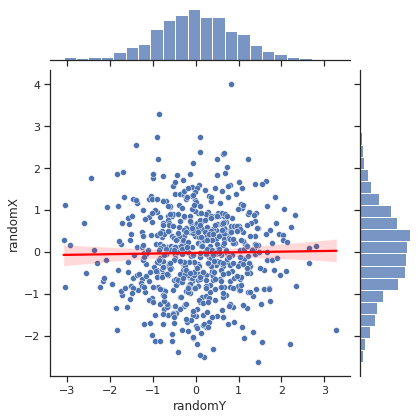

In [ ]:
# Correlación parametrica r de Pearson 5% de nivel de significancia
# Ho: No existe correlacion entre las variables A y B.
# Ha: Existe correlacion entre las variables A y B.
# Graficamos las variables a correlacionar
# con línea de tendencia
g=sns.jointplot(x=df3['randomY'], y=df3['randomX'])
sns.regplot(df3['randomY'], df3['randomX'], ax=g.ax_joint, scatter=False, color= 'red');

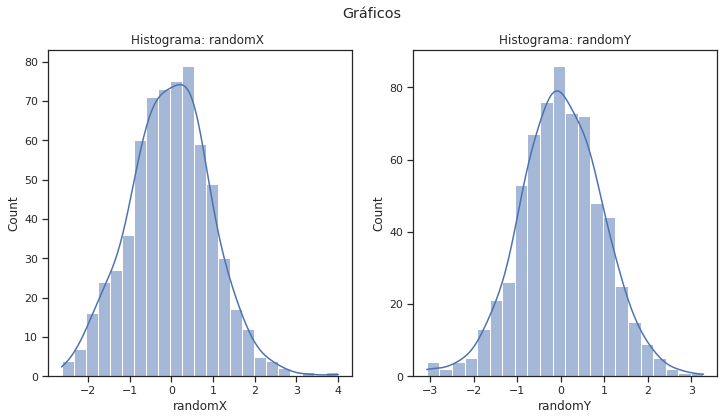

In [ ]:
# Gráfico distribución de las variables
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))  # 1 Fila [0]
fig.suptitle('Gráficos')
axes[0].set_title('Histograma: randomX ')
axes[1].set_title('Histograma: randomY')
sns.histplot(x='randomX', data=df3, ax=axes[0], kde= True)
sns.histplot(x='randomY', data=df3, ax=axes[1], kde= True)

In [ ]:
# Correlación r de pearson
# Ho: Las variables A y B son mutuamente independientes.
# Ha: Las variables A y B son mutuamente dependientes.
from scipy.stats import pearsonr, spearmanr
r, p = pearsonr(df3['randomX'], df3['randomY'])
print('Correlación Pearson=%.3f, p-value=%.3f' % (r, p))
# No hay correlación entre ambas variables, por tanto, son independientes 

Correlación Pearson=0.015, p-value=0.702


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:1667: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


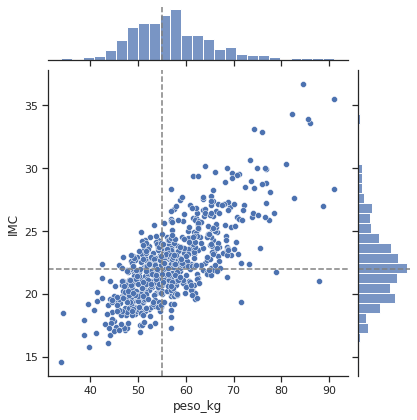

In [ ]:
# Prueba de correlación no parametrica
g = sns.JointGrid(x="peso_kg", y="IMC", data=df3, size=6, palette = "ch:s=.50,rot=-.35")
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=55, y=22)

In [ ]:
# Correlación spearmanr para no pruebas no parametricas
rho, p = spearmanr(df3['peso_kg'], df3['IMC'])
print('Correlación Rho=%.3f, p-value=%.3f' % (rho, p))
# Las variables son dependientes 

Correlación Rho=0.702, p-value=0.000


In [ ]:
# Podemos realizar una prueba de independencia para dos variables cualitativas: chi-cuadrada
# 2 variables son cualitativas (ordinales y/o nominales)
# Ho: Las variables A y B son mutuamente independientes.
# Ha: Las variables A y B son mutuamente dependientes.
contingencia= pd.crosstab(df3['grupos_biceps'], df3['Grupos']) 
contingencia

Grupos,Alto Riesgo,Bajo Riesgo
grupos_biceps,,
Grupo A,49,72
Grupo B,117,106
Grupo C,59,87
Grupo D,59,53
Grupo E,31,19


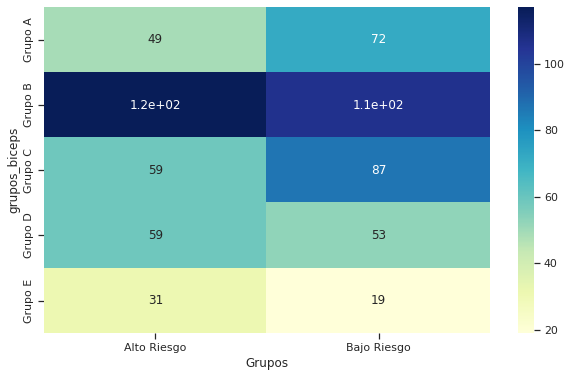

In [ ]:
# Mapa de calor
plt.figure(figsize=(10,6)) 
sns.heatmap(contingencia, annot=True, cmap="YlGnBu")

In [ ]:
# Chi-square test of independence. 
from scipy.stats import chi2_contingency
c, p, dof, expected = chi2_contingency(contingencia)
# Print the p-value
print('p-value = %.3f'% p)
# Las variables son mutuamente dependientes

p-value = 0.013


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


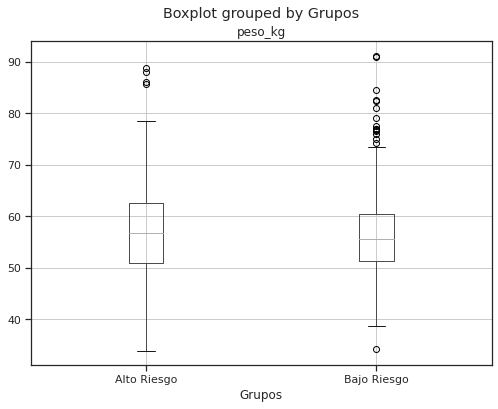

In [ ]:
# Prueba parametrica de dos muestras independientes: 
# Ho: Mu1 = Mu2; No existen diferencias entre las medias.
# Ha: Mu1 <> Mu2; Existen diferencias entre las medias.
# Nivel de significancia: 5%
# Podemos utilizar las variables distribuidas normalmente creadas 
df3.boxplot(column="peso_kg", by="Grupos", figsize=(8,6))
plt.show()

In [ ]:
# Extrayendo la data para la prueba: riesgo y score
Grupos_0 = df3[df3['Grupos'] =="Bajo Riesgo"]['peso_kg']
Grupos_1 = df3[df3['Grupos'] =='Alto Riesgo']['peso_kg']
print("grupo 0= ", Grupos_0 )
print("grupo 1= ", Grupos_1 )

grupo 0=  0      71.2
1      61.0
2      49.1
3      54.6
4      58.0
       ... 
332    50.4
333    50.3
334    59.8
335    60.1
336    60.3
Name: peso_kg, Length: 337, dtype: float64
grupo 1=  337    60.6
338    55.2
339    56.2
340    76.0
341    60.4
       ... 
647    88.0
648    48.6
649    58.9
650    88.7
651    57.6
Name: peso_kg, Length: 315, dtype: float64


In [ ]:
# Realizando la prueba t de 2 muestras independientes
from scipy.stats import ttest_ind
stadis, p = ttest_ind(Grupos_0, Grupos_1)
print('Prueba T=%.3f, p-value=%.3f' % (stadis, p))
# No existen diferencias entre las medias con un nivel de significancia del 5%

Prueba T=-1.533, p-value=0.126


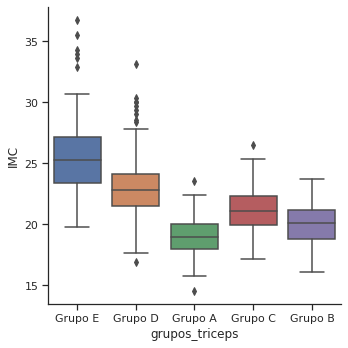

In [ ]:
# Prueba parametrica ANOVA para n muestras independientes 
# Ho: Mu1 = Mu2 = Mun; No existen diferencias entre las medias de los "n" grupos.
# Ha: Mu1 <> Mun; Existen diferencias entre al menos dos medias.
import seaborn as sns
sns.catplot(x = "grupos_triceps", y = "IMC", data = df3, kind = "box");

In [ ]:
# Tabla de frecuencia de la variable de agrupamiento
grupos_count = (df3.groupby("grupos_triceps").agg(frequency=("grupos_triceps", "count")))
grupos_count["Acumulado"] = grupos_count["frequency"].cumsum()
grupos_count

,frequency,Acumulado
grupos_triceps,,
Grupo A,47,47
Grupo B,53,100
Grupo C,173,273
Grupo D,262,535
Grupo E,117,652


In [ ]:
# Realizando la prueba ANOVA para "n" muestras independientes
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('IMC ~ grupos_triceps', data =df3).fit()
anova = sm.stats.anova_lm(mod, typ=2)
print(anova)
# Con un nivel de significancia del 5% al menos un par de medias son significativamente distintas la una de la otra.

                     sum_sq     df           F        PR(>F)
grupos_triceps  2397.660642    4.0  109.729475  2.327969e-71
Residual        3534.343059  647.0         NaN           NaN


In [ ]:
# Test de Levene
# Prueba de igualdad de varianzas
# Ho: No existen diferencias entre las varianzas / homoscedasticidad (igualdad de varianzas)
# Ha: Existen diferencias entre las varianzas / no son iguales (homogénea)
# Extraemos la data para la prueba: IMC y grupo_triceps
grupo_1 = df3[df3['grupos_triceps'] =='Grupo A']['IMC']
grupo_2 = df3[df3['grupos_triceps'] =='Grupo B']['IMC']
grupo_3 = df3[df3['grupos_triceps'] =='Grupo C']['IMC']
grupo_4 = df3[df3['grupos_triceps'] =='Grupo D']['IMC']
grupo_5 = df3[df3['grupos_triceps'] =='Grupo E']['IMC']
print("grupo 1= ", grupo_1 )
print("grupo 2= ", grupo_2 )
print("grupo 3= ", grupo_3 )
print("grupo 4= ", grupo_4 )
print("grupo 5= ", grupo_5 )

grupo 1=  6      17.32
9      17.54
10     18.44
11     20.04
12     19.83
13     18.71
28     18.93
29     20.55
30     20.03
58     20.00
60     20.91
88     18.41
109    18.87
116    20.56
120    22.42
126    18.63
161    16.75
163    21.37
166    19.51
171    19.30
179    15.76
194    19.91
198    18.88
202    22.40
222    19.22
224    16.74
227    19.48
248    20.00
255    20.73
265    17.02
270    17.29
280    17.29
282    20.83
299    19.84
315    23.52
412    19.87
422    18.98
434    16.97
448    18.28
452    18.91
454    21.17
463    18.22
470    18.93
482    17.78
535    19.96
548    14.54
612    17.64
Name: IMC, dtype: float64
grupo 2=  25     18.76
27     20.32
32     20.46
36     21.36
37     20.99
41     17.33
46     21.77
63     20.67
69     20.49
71     17.29
103    23.71
123    21.73
209    18.43
229    19.32
237    21.86
239    18.66
257    22.40
287    21.43
288    20.13
298    18.86
304    18.57
326    20.88
363    21.48
393    19.74
394    18.61
395    19.95
397  

In [ ]:
# Importamos libreria para la prueba
from scipy.stats import levene
stat, p = levene(grupo_1, grupo_2, grupo_3, grupo_4, grupo_4)
print('Prueba Igualdad de Varianzas=%.3f, p-value=%.3f' % (stat, p))
# Existen diferencias significativas entre las varianzas con un nivel de significancia del 5%

Prueba Igualdad de Varianzas=4.071, p-value=0.003


In [ ]:
# Prueba U de Mann Whitney: muestras independientes (no paramétrica)
# Diferencia de medianas
# Ho: U1 = U2; de la variable de estudio.
# Ha: U1 <> U2; de la variable de estudio
edad_grupos_0 = df3[df3['Grupos'] =='Bajo Riesgo']['edad']
edad_grupos_1 = df3[df3['Grupos'] =='Alto Riesgo']['edad']
print("Grupo 0= ", edad_grupos_0 )
print("Grupo 1= ", edad_grupos_1 )

Grupo 0=  0      16
1      16
2      16
3      16
4      16
       ..
332    14
333    15
334    15
335    15
336    15
Name: edad, Length: 337, dtype: int64
Grupo 1=  337    14
338    15
339    15
340    15
341    15
       ..
647    14
648    14
649    15
650    14
651    14
Name: edad, Length: 315, dtype: int64


In [ ]:
# Checamos la estructura de los grupos segmentados
print("Grupo bajo riesgo --> n1: ", len(edad_grupos_0))
print("Grupo alto riesgo --> n2: ", len(edad_grupos_1))

Grupo bajo riesgo --> n1:  337
Grupo alto riesgo --> n2:  315


In [ ]:
# Importamos la libreria para la prueba
from scipy.stats import kruskal
KW_test, p =kruskal(edad_grupos_0, edad_grupos_1)
print('Prueba de U de Mann Whitney=%.3f, p-value=%.3f' % (KW_test, p))
# La edad de los grupos de bajo riesgo y alto riesgo es estadísticamente diferentes, con una significancia del 5%.

Prueba de U de Mann Whitney=328.848, p-value=0.000


# **¡Muchas gracias!**